# Solving Blackjack with Q-Learning

Blackjack is one of the most popular casino card games that is also infamous for being beatable under certain conditions. This version of the game uses an infinite deck (we draw the cards with replacement), so counting cards won’t be a viable strategy in our simulated game. Full documentation can be found at https://gymnasium.farama.org/environments/toy_text/blackjack

Objective: To win, your card sum should be greater than the dealers without exceeding 21.

Actions: Agents can pick between two actions:

stand (0): the player takes no more cards
hit (1): the player will be given another card, however the player could get over 21 and bust
Approach: To solve this environment by yourself, you can pick your favorite discrete RL algorithm. The presented solution uses Q-learning (a model-free RL algorithm).

## Add actions

[Add Double Down, Surrender & Insurance on top of Stand & Hit]
+ **Stand:** Take no more cards; also known as "stand pat", "sit", "stick", or "stay".
+ **Hit:** Take another card.
+ **Double down:** Increase the initial bet by 100% and take exactly one more card. The additional bet is placed next to the original bet. Non-controlling players may or may not double their wager, but they still only take one card. [Only in the first round]
+ **Surrender:** Forfeit half the bet and end the hand immediately. [Only in the first round]
+ **Insurance:** If the dealer shows an ace, an "insurance" bet is allowed. Insurance is a side bet that the dealer has a blackjack. The dealer asks for insurance bets before the first player plays. Insurance bets of up to half the player's current bet are placed on the "insurance bar" above the player's cards. If the dealer has a blackjack, insurance pays 2 to 1. If the player also has a blackjack, the player loses nothing and win the double insurance bet. If the player doesn't have a black jack, the player breaks even. If the dealer doesn't have a blackjack, the player loses the insurance bet but can continue the game. [Only in the first round]

[Not added]
+ **Split:** Create two hands from a starting hand where both cards are the same value. Each new hand gets a second card resulting in two starting hands. This requires an additional bet on the second hand. The two hands are played out independently, and the wager on each hand is won or lost independently. In the case of cards worth 10 points, some casinos only allow splitting when the cards rank the same. For example, 10-10 could be split, but K-10 could not. Doubling and re-splitting after splitting may be restricted. A 10-valued card and an ace resulting from a split usually isn't considered a blackjack. Hitting split aces is often not allowed. Non-controlling players can opt to put up a second bet or not. If they do not, they only get paid or lose on one of the two post-split hands.

## Enviornment Setup

In [2]:
# Author: Till Zemann
# License: MIT License

from __future__ import annotations
from collections import defaultdict

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.patches import Patch
from tqdm import tqdm
import gymnasium as gym

### Create a Folder called envs_manual and inside that folder create:
    1. init.py
    2. blackjack_insuranc.py 
    3. setup.py

### Code in init.py

In [557]:
# from .blackjack_insurance import BlackjackEnvWithInsurance

### Code in blackjack_insurance.py

In [561]:
# import os
# from typing import Optional

# import numpy as np
# import gymnasium as gym  # ✅ Change `gym` to `gymnasium`
# from gymnasium import spaces  # ✅ Import spaces from Gymnasium
# from gymnasium.error import DependencyNotInstalled  # ✅ Import error handling from Gymnasium

# def cmp(a, b):
#     return float(a > b) - float(a < b)

# # 1 = Ace, 2-10 = Number cards, Jack/Queen/King = 10
# deck = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10]

# def draw_card(np_random):
#     return int(np_random.choice(deck))

# def draw_hand(np_random):
#     return [draw_card(np_random), draw_card(np_random)]

# def usable_ace(hand):
#     return 1 in hand and sum(hand) + 10 <= 21

# def sum_hand(hand):
#     if usable_ace(hand):
#         return sum(hand) + 10
#     return sum(hand)

# def is_bust(hand):
#     return sum_hand(hand) > 21

# def score(hand):
#     return 0 if is_bust(hand) else sum_hand(hand)

# def is_natural(hand):
#     return sorted(hand) == [1, 10]

# class BlackjackEnvWithInsurance(gym.Env):
#     """Blackjack environment with Insurance added"""

#     metadata = {"render_modes": ["human", "rgb_array"], "render_fps": 4}

#     def __init__(self, render_mode: Optional[str] = None, natural=False, sab=False):
#         # Updated action space: 0 = Stand, 1 = Hit, 2 = Double Down, 3 =Surrender, 4 =Insurance
#         self.action_space = spaces.Discrete(5)  # ✅ Update to 5 actions

#         # Observation space now includes (insurance available flag)
#         self.observation_space = spaces.Tuple(
#             (spaces.Discrete(32), spaces.Discrete(11), spaces.Discrete(2), spaces.Discrete(2))
#         )

#         self.natural = natural
#         self.sab = sab
#         self.render_mode = render_mode

#     def step(self, action):
#         assert self.action_space.contains(action)
#         reward = 0.0
#         terminated = False
#         game_result = "Unknown"  # ✅ Initialize `game_result` early
    
#         # ✅ Double Down (Action 2)
#         if action == 2:
#             if len(self.player) > 2:  # ❌ Double down only allowed on first two cards
#                 return self._get_obs(), -1, False, False, {
#                     "num_cards": len(self.player), 
#                     "dealer_hand": self.dealer, 
#                     "game_result": "Invalid Move"
#                 }
    
#             self.player.append(draw_card(self.np_random))  # Draw one final card
    
#             if is_bust(self.player):  # Bust loses immediately
#                 reward = -2.0
#                 terminated = True
#                 game_result = "Loss"
#             else:  # Otherwise, dealer plays
#                 terminated = True
#                 while sum_hand(self.dealer) < 17:
#                     self.dealer.append(draw_card(self.np_random))
#                 reward = cmp(score(self.player), score(self.dealer)) * 2.0
#                 game_result = "Win" if reward > 0 else "Loss" if reward < 0 else "Push"
    
#             return self._get_obs(), reward, terminated, False, {
#                 "num_cards": len(self.player),
#                 "dealer_hand": self.dealer,
#                 "game_result": game_result
#             }
    
#         # ✅ Surrender (Action 3)
#         if action == 3:
#             reward = -0.5  # Player loses half the bet
#             terminated = True
#             game_result = "Loss"
#             return self._get_obs(), reward, terminated, False, {
#                 "num_cards": len(self.player),
#                 "dealer_hand": self.dealer,
#                 "game_result": game_result
#             }
    
#         # ✅ Insurance (Action 4)
#         if action == 4:
#             if self.dealer[0] != 1:  # ❌ Insurance only if dealer has an Ace
#                 reward -= 0.5  # ✅ Lose insurance bet
#                 game_result = "Loss"
#                 return self._get_obs(insurance_available=0), reward, False, False, {
#                     "num_cards": len(self.player),
#                     "dealer_hand": self.dealer,
#                     "game_result": game_result
#                 }
    
#             self.insurance_bet = 0.5  # ✅ Insurance is half the bet
    
#             if is_natural(self.dealer):  
#                 reward = self.insurance_bet * 2  # ✅ Insurance pays 2:1 if dealer has Blackjack
#                 game_result = "Win"
#                 return self._get_obs(insurance_available=0), reward, True, False, {
#                     "num_cards": len(self.player),
#                     "dealer_hand": self.dealer,
#                     "game_result": game_result
#                 }
#             else:
#                 reward -= self.insurance_bet  # ✅ Lose insurance if dealer does not have Blackjack
#                 game_result = "Loss"
    
#             return self._get_obs(insurance_available=0), reward, False, False, {
#                 "num_cards": len(self.player),
#                 "dealer_hand": self.dealer,
#                 "game_result": game_result
#             }
    
#         # ✅ Hit (Action 1)
#         if action == 1:
#             self.player.append(draw_card(self.np_random))
#             if is_bust(self.player):
#                 terminated = True
#                 reward = -1.0
#                 game_result = "Loss"
#             return self._get_obs(), reward, terminated, False, {
#                 "num_cards": len(self.player),
#                 "dealer_hand": self.dealer,
#                 "game_result": game_result
#             }

#         else:  # Stand (Dealer plays)
#             terminated = True
#             while sum_hand(self.dealer) < 17:
#                 self.dealer.append(draw_card(self.np_random))

#             reward = cmp(score(self.player), score(self.dealer))

#             if self.sab and is_natural(self.player) and not is_natural(self.dealer):
#                 reward = 1.0  # Player wins automatically with a natural blackjack
#             elif not self.sab and self.natural and is_natural(self.player) and reward == 1.0:
#                 reward = 1.5  # Natural blackjack payout

#         if self.render_mode == "human":
#             self.render()

#         # ✅ Store dealer's final hand and game result in `info`
#         game_result = "Win" if reward > 0 else "Loss" if reward < 0 else "Push"
        
#         return self._get_obs(), reward, terminated, False, {
#             "num_cards": len(self.player),
#             "dealer_hand": self.dealer,  # ✅ Store dealer's full hand
#             "game_result": game_result   # ✅ Store game outcome
#         }
    
#     def _get_obs(self, insurance_available=None):
#         if insurance_available is None:  # If not manually overridden
#             insurance_available = 1 if self.dealer[0] == 1 and len(self.player) <= 2 else 0 
            
#         obs = (sum_hand(self.player), self.dealer[0], usable_ace(self.player), insurance_available)
#         return obs

#     def reset(self, seed: Optional[int] = None, options: Optional[dict] = None):
#         super().reset(seed=seed)
#         self.dealer = draw_hand(self.np_random)
#         self.player = draw_hand(self.np_random)
#         self.insurance_bet = 0  # Reset insurance bet

#         obs = self._get_obs()  # ✅ Get observation
        
#         # ✅ Create info dictionary
#         info = {
#             "num_cards": len(self.player)  # ✅ Store number of cards in player's hand
#         }
        
#         _, dealer_card_value, _, _ = self._get_obs()

#         suits = ["C", "D", "H", "S"]
#         self.dealer_top_card_suit = self.np_random.choice(suits)

#         if dealer_card_value == 1:
#             self.dealer_top_card_value_str = "A"
#         elif dealer_card_value == 10:
#             self.dealer_top_card_value_str = self.np_random.choice(["J", "Q", "K"])
#         else:
#             self.dealer_top_card_value_str = str(dealer_card_value)

#         if self.render_mode == "human":
#             self.render()

#         return obs, info  # ✅ Now returns both obs and info

#     def render(self):
#         if self.render_mode is None:
#             gym.logger.warn(
#                 "You are calling render method without specifying any render mode. "
#                 "You can specify the render_mode at initialization, "
#                 f'e.g. gym("{self.spec.id}", render_mode="rgb_array")'
#             )
#             return

#     def close(self):
#         pass


### Code in setup.py

In [564]:
# from setuptools import setup, find_packages

# setup(
#     name="blackjack_insurance",
#     version="0.1",
#     packages=find_packages(),
#     install_requires=["gymnasium"],
# )

### Use the Custom Environment

In [24]:
# pip install -e "/Users/sherry/Desktop/Reinforcement Learning/Project/envs_manual"

Obtaining file:///Users/sherry/Desktop/Reinforcement%20Learning/Project/envs_manual
  Preparing metadata (setup.py) ... done
  Running setup.py develop for custom-blackjack
Note: you may need to restart the kernel to use updated packages.


### Register as a Gym Environment

First of all, we call ``env.reset()`` to start an episode. This function
resets the environment to a starting position and returns an initial
``observation``. We usually also set ``done = False``. This variable
will be useful later to check if a game is terminated (i.e., the player wins or loses).

In [1]:
import sys
sys.path.append("/Users/sherry/Desktop/Reinforcement Learning/Final Project v2/envs_manual")

In [3]:
from blackjack_insurance import BlackjackEnvWithInsurance

In [4]:
import gymnasium as gym
from gymnasium.envs.registration import register

# Correct way to unregister in Gymnasium
env_id = "BlackjackInsurance-v1"

if env_id in gym.registry:
    del gym.registry[env_id]  # Unregister previous version

# Register the custom environment
register(
    id=env_id,
    entry_point="envs_manual.blackjack_insurance:BlackjackEnvWithInsurance",
    kwargs={"natural": True},  # Pass custom arguments if needed
)

# Create the environment
env = gym.make(env_id, natural=True)
obs, _ = env.reset()

print("Environment registered and initialized successfully!")

Environment registered and initialized successfully!


## Executing an action¶

In [8]:
obs, info = env.reset()
print(f"Initial Observation: {obs}")

Initial Observation: (19, 10, False, 0)


Initial Observation: (19, 10, False, 0)
Note that our observation is a 4-tuple consisting of 4 values:
- The player's current sum
- The value of the dealer's face-up card
- A boolean indicating whether the player holds a usable ace (an ace is usable if it counts as 11 without busting)
- A flag for whether the insurance option is available (0 = not available, 1 = available)

### Examples:

#### Natural Blackjack

In [29]:
import gymnasium as gym

# Define action meanings
action_meanings = {
    0: "Stand",
    1: "Hit",
    2: "Double Down",
    3: "Surrender",
    4: "Insurance",
}

print("\n🎰 Welcome to Custom Blackjack!")
env = gym.make(env_id, natural=True)  # Initialize environment
obs, info = env.reset()

print(f"\n🃏 Your Starting Hand: {obs}")

# Interactive loop
done = False
while not done:
    # Get valid actions based on game state
    valid_actions = [0, 1]  # Default: Stand, Hit allowed

    # ✅ Allow Double Down, Surrender (only on first move)
    if info["num_cards"] == 2:
        valid_actions.append(2)  # Double Down
        valid_actions.append(3)  # Surrender
    
    # ✅ Allow Insurance
    if obs[1] == 1 and obs[3] == 1:  # ✅ Only allow if insurance is still available
        valid_actions.append(4)  # ✅ Insurance only appears before selecting it

    print("\n📌 Available actions:")
    for action in sorted(valid_actions):  # Only show valid actions
        print(f"{action}: {action_meanings[action]}")

    # Select an action manually
    try:
        action = int(input("\n🎯 Select an action: "))
        if action not in valid_actions:
            raise ValueError  # Invalid input will go to the except block
    except ValueError:
        print("❌ Invalid action! Choose from the available options.")
        continue  # Ask for input again

    # Take the selected action
    obs, reward, terminated, truncated, info = env.step(action)

    print(f"\n✅ Action Taken: {action_meanings[action]}")
    print(f"🃏 New Observation: {obs}")
    print(f"💰 Reward: {reward}")

    # Check if the game has ended
    done = terminated or truncated
    if done:
        # ✅ Define `usable_ace(hand)` inside the function
        def usable_ace(hand):
            return 1 in hand and sum(hand) + 10 <= 21
        
        def sum_hand(hand):
            if usable_ace(hand):
                return sum(hand) + 10
            return sum(hand)
        
        dealer_hand = info.get("dealer_hand", [])
        dealer_sum = sum_hand(dealer_hand) if dealer_hand else 0  # ✅ Compute dealer's sum
        game_result = info.get("game_result", "Unknown")
    
        print("\n🏁 Game Over!")
        print(f"🤵 Dealer's Full Hand: {dealer_hand} (Total: {dealer_sum})")  # ✅ Show hand + sum
        print(f"🎉 Result: {game_result}")

        # Provide game outcome message
        if reward > 0:
            print("🏆 Congratulations, you won!")
        elif reward < 0:
            print("💀 You lost this round. Try again!")
        else:
            print("⚖️ It's a draw.")

        break  # End game loop


🎰 Welcome to Custom Blackjack!

🃏 Your Starting Hand: (21, 10, True, 0)

📌 Available actions:
0: Stand
1: Hit
2: Double Down
3: Surrender



🎯 Select an action:  0



✅ Action Taken: Stand
🃏 New Observation: (21, 10, True, 0)
💰 Reward: 1.5

🏁 Game Over!
🤵 Dealer's Full Hand: [10, 5, 8] (Total: 23)
🎉 Result: Win
🏆 Congratulations, you won!


#### Double Down

In [65]:
import gymnasium as gym

# Define action meanings
action_meanings = {
    0: "Stand",
    1: "Hit",
    2: "Double Down",
    3: "Surrender",
    4: "Insurance",
}

print("\n🎰 Welcome to Custom Blackjack!")
env = gym.make(env_id, natural=True)  # Initialize environment
obs, info = env.reset()

print(f"\n🃏 Your Starting Hand: {obs}")

# Interactive loop
done = False
while not done:
    # Get valid actions based on game state
    valid_actions = [0, 1]  # Default: Stand, Hit allowed

    # ✅ Allow Double Down, Surrender (only on first move)
    if info["num_cards"] == 2:
        valid_actions.append(2)  # Double Down
        valid_actions.append(3)  # Surrender
    
    # ✅ Allow Insurance
    if obs[1] == 1 and obs[3] == 1:  # ✅ Only allow if insurance is still available
        valid_actions.append(4)  # ✅ Insurance only appears before selecting it

    print("\n📌 Available actions:")
    for action in sorted(valid_actions):  # Only show valid actions
        print(f"{action}: {action_meanings[action]}")

    # Select an action manually
    try:
        action = int(input("\n🎯 Select an action: "))
        if action not in valid_actions:
            raise ValueError  # Invalid input will go to the except block
    except ValueError:
        print("❌ Invalid action! Choose from the available options.")
        continue  # Ask for input again

    # Take the selected action
    obs, reward, terminated, truncated, info = env.step(action)

    print(f"\n✅ Action Taken: {action_meanings[action]}")
    print(f"🃏 New Observation: {obs}")
    print(f"💰 Reward: {reward}")

    # Check if the game has ended
    done = terminated or truncated
    if done:
        # ✅ Define `usable_ace(hand)` inside the function
        def usable_ace(hand):
            return 1 in hand and sum(hand) + 10 <= 21
        
        def sum_hand(hand):
            if usable_ace(hand):
                return sum(hand) + 10
            return sum(hand)
        
        dealer_hand = info.get("dealer_hand", [])
        dealer_sum = sum_hand(dealer_hand) if dealer_hand else 0  # ✅ Compute dealer's sum
        game_result = info.get("game_result", "Unknown")
    
        print("\n🏁 Game Over!")
        print(f"🤵 Dealer's Full Hand: {dealer_hand} (Total: {dealer_sum})")  # ✅ Show hand + sum
        print(f"🎉 Result: {game_result}")

        # Provide game outcome message
        if reward > 0:
            print("🏆 Congratulations, you won!")
        elif reward < 0:
            print("💀 You lost this round. Try again!")
        else:
            print("⚖️ It's a draw.")

        break  # End game loop


🎰 Welcome to Custom Blackjack!

🃏 Your Starting Hand: (10, 2, False, 0)

📌 Available actions:
0: Stand
1: Hit
2: Double Down
3: Surrender



🎯 Select an action:  2



✅ Action Taken: Double Down
🃏 New Observation: (20, 2, False, 0)
💰 Reward: 2.0

🏁 Game Over!
🤵 Dealer's Full Hand: [2, 10, 6] (Total: 18)
🎉 Result: Win
🏆 Congratulations, you won!


#### Insurance

In [20]:
import gymnasium as gym

# Define action meanings
action_meanings = {
    0: "Stand",
    1: "Hit",
    2: "Double Down",
    3: "Surrender",
    4: "Insurance",
}

print("\n🎰 Welcome to Custom Blackjack!")
env = gym.make(env_id, natural=True)  # Initialize environment
obs, info = env.reset()

print(f"\n🃏 Your Starting Hand: {obs}")

# Interactive loop
done = False
while not done:
    # Get valid actions based on game state
    valid_actions = [0, 1]  # Default: Stand, Hit allowed

    # ✅ Allow Double Down, Surrender (only on first move)
    if info["num_cards"] == 2:
        valid_actions.append(2)  # Double Down
        valid_actions.append(3)  # Surrender
    
    # ✅ Allow Insurance
    if obs[1] == 1 and obs[3] == 1:  # ✅ Only allow if insurance is still available
        valid_actions.append(4)  # ✅ Insurance only appears before selecting it

    print("\n📌 Available actions:")
    for action in sorted(valid_actions):  # Only show valid actions
        print(f"{action}: {action_meanings[action]}")

    # Select an action manually
    try:
        action = int(input("\n🎯 Select an action: "))
        if action not in valid_actions:
            raise ValueError  # Invalid input will go to the except block
    except ValueError:
        print("❌ Invalid action! Choose from the available options.")
        continue  # Ask for input again

    # Take the selected action
    obs, reward, terminated, truncated, info = env.step(action)

    print(f"\n✅ Action Taken: {action_meanings[action]}")
    print(f"🃏 New Observation: {obs}")
    print(f"💰 Reward: {reward}")

    # Check if the game has ended
    done = terminated or truncated
    if done:
        # ✅ Define `usable_ace(hand)` inside the function
        def usable_ace(hand):
            return 1 in hand and sum(hand) + 10 <= 21
        
        def sum_hand(hand):
            if usable_ace(hand):
                return sum(hand) + 10
            return sum(hand)
        
        dealer_hand = info.get("dealer_hand", [])
        dealer_sum = sum_hand(dealer_hand) if dealer_hand else 0  # ✅ Compute dealer's sum
        game_result = info.get("game_result", "Unknown")
    
        print("\n🏁 Game Over!")
        print(f"🤵 Dealer's Full Hand: {dealer_hand} (Total: {dealer_sum})")  # ✅ Show hand + sum
        print(f"🎉 Result: {game_result}")

        # Provide game outcome message
        if reward > 0:
            print("🏆 Congratulations, you won!")
        elif reward < 0:
            print("💀 You lost this round. Try again!")
        else:
            print("⚖️ It's a draw.")

        break  # End game loop


🎰 Welcome to Custom Blackjack!

🃏 Your Starting Hand: (15, 1, False, 1)

📌 Available actions:
0: Stand
1: Hit
2: Double Down
3: Surrender
4: Insurance



🎯 Select an action:  4



✅ Action Taken: Insurance
🃏 New Observation: (15, 1, False, 0)
💰 Reward: -0.5

📌 Available actions:
0: Stand
1: Hit
2: Double Down
3: Surrender



🎯 Select an action:  3



✅ Action Taken: Surrender
🃏 New Observation: (15, 1, False, 1)
💰 Reward: -0.5

🏁 Game Over!
🤵 Dealer's Full Hand: [1, 8] (Total: 19)
🎉 Result: Loss
💀 You lost this round. Try again!


In [16]:
import gymnasium as gym

# Define action meanings
action_meanings = {
    0: "Stand",
    1: "Hit",
    2: "Double Down",
    3: "Surrender",
    4: "Insurance",
}

print("\n🎰 Welcome to Custom Blackjack!")
env = gym.make(env_id, natural=True)  # Initialize environment
obs, info = env.reset()

print(f"\n🃏 Your Starting Hand: {obs}")

# Interactive loop
done = False
while not done:
    # Get valid actions based on game state
    valid_actions = [0, 1]  # Default: Stand, Hit allowed

    # ✅ Allow Double Down, Surrender (only on first move)
    if info["num_cards"] == 2:
        valid_actions.append(2)  # Double Down
        valid_actions.append(3)  # Surrender
    
    # ✅ Allow Insurance
    if obs[1] == 1 and obs[3] == 1:  # ✅ Only allow if insurance is still available
        valid_actions.append(4)  # ✅ Insurance only appears before selecting it

    print("\n📌 Available actions:")
    for action in sorted(valid_actions):  # Only show valid actions
        print(f"{action}: {action_meanings[action]}")

    # Select an action manually
    try:
        action = int(input("\n🎯 Select an action: "))
        if action not in valid_actions:
            raise ValueError  # Invalid input will go to the except block
    except ValueError:
        print("❌ Invalid action! Choose from the available options.")
        continue  # Ask for input again

    # Take the selected action
    obs, reward, terminated, truncated, info = env.step(action)

    print(f"\n✅ Action Taken: {action_meanings[action]}")
    print(f"🃏 New Observation: {obs}")
    print(f"💰 Reward: {reward}")

    # Check if the game has ended
    done = terminated or truncated
    if done:
        # ✅ Define `usable_ace(hand)` inside the function
        def usable_ace(hand):
            return 1 in hand and sum(hand) + 10 <= 21
        
        def sum_hand(hand):
            if usable_ace(hand):
                return sum(hand) + 10
            return sum(hand)
        
        dealer_hand = info.get("dealer_hand", [])
        dealer_sum = sum_hand(dealer_hand) if dealer_hand else 0  # ✅ Compute dealer's sum
        game_result = info.get("game_result", "Unknown")
    
        print("\n🏁 Game Over!")
        print(f"🤵 Dealer's Full Hand: {dealer_hand} (Total: {dealer_sum})")  # ✅ Show hand + sum
        print(f"🎉 Result: {game_result}")

        # Provide game outcome message
        if reward > 0:
            print("🏆 Congratulations, you won!")
        elif reward < 0:
            print("💀 You lost this round. Try again!")
        else:
            print("⚖️ It's a draw.")

        break  # End game loop


🎰 Welcome to Custom Blackjack!

🃏 Your Starting Hand: (19, 1, True, 1)

📌 Available actions:
0: Stand
1: Hit
2: Double Down
3: Surrender
4: Insurance



🎯 Select an action:  4



✅ Action Taken: Insurance
🃏 New Observation: (19, 1, True, 0)
💰 Reward: -0.5

📌 Available actions:
0: Stand
1: Hit
2: Double Down
3: Surrender



🎯 Select an action:  0



✅ Action Taken: Stand
🃏 New Observation: (19, 1, True, 1)
💰 Reward: 1.0

🏁 Game Over!
🤵 Dealer's Full Hand: [1, 7] (Total: 18)
🎉 Result: Win
🏆 Congratulations, you won!


In [72]:
import gymnasium as gym

# Define action meanings
action_meanings = {
    0: "Stand",
    1: "Hit",
    2: "Double Down",
    3: "Surrender",
    4: "Insurance",
}

print("\n🎰 Welcome to Custom Blackjack!")
env = gym.make(env_id, natural=True)  # Initialize environment
obs, info = env.reset()

print(f"\n🃏 Your Starting Hand: {obs}")

# Interactive loop
done = False
while not done:
    # Get valid actions based on game state
    valid_actions = [0, 1]  # Default: Stand, Hit allowed

    # ✅ Allow Double Down, Surrender (only on first move)
    if info["num_cards"] == 2:
        valid_actions.append(2)  # Double Down
        valid_actions.append(3)  # Surrender
    
    # ✅ Allow Insurance
    if obs[1] == 1 and obs[3] == 1:  # ✅ Only allow if insurance is still available
        valid_actions.append(4)  # ✅ Insurance only appears before selecting it

    print("\n📌 Available actions:")
    for action in sorted(valid_actions):  # Only show valid actions
        print(f"{action}: {action_meanings[action]}")

    # Select an action manually
    try:
        action = int(input("\n🎯 Select an action: "))
        if action not in valid_actions:
            raise ValueError  # Invalid input will go to the except block
    except ValueError:
        print("❌ Invalid action! Choose from the available options.")
        continue  # Ask for input again

    # Take the selected action
    obs, reward, terminated, truncated, info = env.step(action)

    print(f"\n✅ Action Taken: {action_meanings[action]}")
    print(f"🃏 New Observation: {obs}")
    print(f"💰 Reward: {reward}")

    # Check if the game has ended
    done = terminated or truncated
    if done:
        # ✅ Define `usable_ace(hand)` inside the function
        def usable_ace(hand):
            return 1 in hand and sum(hand) + 10 <= 21
        
        def sum_hand(hand):
            if usable_ace(hand):
                return sum(hand) + 10
            return sum(hand)
        
        dealer_hand = info.get("dealer_hand", [])
        dealer_sum = sum_hand(dealer_hand) if dealer_hand else 0  # ✅ Compute dealer's sum
        game_result = info.get("game_result", "Unknown")
    
        print("\n🏁 Game Over!")
        print(f"🤵 Dealer's Full Hand: {dealer_hand} (Total: {dealer_sum})")  # ✅ Show hand + sum
        print(f"🎉 Result: {game_result}")

        # Provide game outcome message
        if reward > 0:
            print("🏆 Congratulations, you won!")
        elif reward < 0:
            print("💀 You lost this round. Try again!")
        else:
            print("⚖️ It's a draw.")

        break  # End game loop


🎰 Welcome to Custom Blackjack!

🃏 Your Starting Hand: (4, 1, False, 1)

📌 Available actions:
0: Stand
1: Hit
2: Double Down
3: Surrender
4: Insurance



🎯 Select an action:  4



✅ Action Taken: Insurance
🃏 New Observation: (4, 1, False, 0)
💰 Reward: -0.5

📌 Available actions:
0: Stand
1: Hit
2: Double Down
3: Surrender



🎯 Select an action:  1



✅ Action Taken: Hit
🃏 New Observation: (12, 1, False, 0)
💰 Reward: 0.0

📌 Available actions:
0: Stand
1: Hit



🎯 Select an action:  1



✅ Action Taken: Hit
🃏 New Observation: (22, 1, False, 0)
💰 Reward: -1.0

🏁 Game Over!
🤵 Dealer's Full Hand: [1, 4] (Total: 15)
🎉 Result: Loss
💀 You lost this round. Try again!


#### Normal game

In [52]:
import gymnasium as gym

# Define action meanings
action_meanings = {
    0: "Stand",
    1: "Hit",
    2: "Double Down",
    3: "Surrender",
    4: "Insurance",
}

print("\n🎰 Welcome to Custom Blackjack!")
env = gym.make(env_id, natural=True)  # Initialize environment
obs, info = env.reset()

print(f"\n🃏 Your Starting Hand: {obs}")

# Interactive loop
done = False
while not done:
    # Get valid actions based on game state
    valid_actions = [0, 1]  # Default: Stand, Hit allowed

    # ✅ Allow Double Down, Surrender (only on first move)
    if info["num_cards"] == 2:
        valid_actions.append(2)  # Double Down
        valid_actions.append(3)  # Surrender
    
    # ✅ Allow Insurance
    if obs[1] == 1 and obs[3] == 1:  # ✅ Only allow if insurance is still available
        valid_actions.append(4)  # ✅ Insurance only appears before selecting it

    print("\n📌 Available actions:")
    for action in sorted(valid_actions):  # Only show valid actions
        print(f"{action}: {action_meanings[action]}")

    # Select an action manually
    try:
        action = int(input("\n🎯 Select an action: "))
        if action not in valid_actions:
            raise ValueError  # Invalid input will go to the except block
    except ValueError:
        print("❌ Invalid action! Choose from the available options.")
        continue  # Ask for input again

    # Take the selected action
    obs, reward, terminated, truncated, info = env.step(action)

    print(f"\n✅ Action Taken: {action_meanings[action]}")
    print(f"🃏 New Observation: {obs}")
    print(f"💰 Reward: {reward}")

    # Check if the game has ended
    done = terminated or truncated
    if done:
        # ✅ Define `usable_ace(hand)` inside the function
        def usable_ace(hand):
            return 1 in hand and sum(hand) + 10 <= 21
        
        def sum_hand(hand):
            if usable_ace(hand):
                return sum(hand) + 10
            return sum(hand)
        
        dealer_hand = info.get("dealer_hand", [])
        dealer_sum = sum_hand(dealer_hand) if dealer_hand else 0  # ✅ Compute dealer's sum
        game_result = info.get("game_result", "Unknown")
    
        print("\n🏁 Game Over!")
        print(f"🤵 Dealer's Full Hand: {dealer_hand} (Total: {dealer_sum})")  # ✅ Show hand + sum
        print(f"🎉 Result: {game_result}")

        # Provide game outcome message
        if reward > 0:
            print("🏆 Congratulations, you won!")
        elif reward < 0:
            print("💀 You lost this round. Try again!")
        else:
            print("⚖️ It's a draw.")

        break  # End game loop


🎰 Welcome to Custom Blackjack!

🃏 Your Starting Hand: (9, 3, False, 0)

📌 Available actions:
0: Stand
1: Hit
2: Double Down
3: Surrender



🎯 Select an action:  1



✅ Action Taken: Hit
🃏 New Observation: (13, 3, False, 0)
💰 Reward: 0.0

📌 Available actions:
0: Stand
1: Hit



🎯 Select an action:  1



✅ Action Taken: Hit
🃏 New Observation: (16, 3, False, 0)
💰 Reward: 0.0

📌 Available actions:
0: Stand
1: Hit



🎯 Select an action:  1



✅ Action Taken: Hit
🃏 New Observation: (21, 3, False, 0)
💰 Reward: 0.0

📌 Available actions:
0: Stand
1: Hit



🎯 Select an action:  0



✅ Action Taken: Stand
🃏 New Observation: (21, 3, False, 0)
💰 Reward: 0.0

🏁 Game Over!
🤵 Dealer's Full Hand: [3, 9, 9] (Total: 21)
🎉 Result: Push
⚖️ It's a draw.


# Building a Q-Learning agent
Let’s build a ``Q-learning agent`` to solve *Blackjack-v1*! We’ll need
some functions for picking an action and updating the agents action
values. To ensure that the agents explores the environment, one possible
solution is the ``epsilon-greedy`` strategy, where we pick a random
action with the percentage ``epsilon`` and the greedy action (currently
valued as the best) ``1 - epsilon``.

## First Train

In [414]:
import gymnasium as gym
from collections import defaultdict
import numpy as np
from tqdm import tqdm

class BlackjackAgent:
    def __init__(
        self,
        env,
        learning_rate: float,
        initial_epsilon: float,
        epsilon_decay: float,
        final_epsilon: float,
        discount_factor: float = 0.95,
    ):
        """Initialize a Reinforcement Learning agent with an empty dictionary
        of state-action values (q_values), a learning rate, and an epsilon."""
        self.q_values = defaultdict(lambda: np.zeros(env.action_space.n))

        self.lr = learning_rate
        self.discount_factor = discount_factor

        self.epsilon = initial_epsilon
        self.epsilon_decay = epsilon_decay
        self.final_epsilon = final_epsilon

        self.training_error = []
    
    def get_action(self, env, obs, info):
        player_sum, dealer_upcard, usable_ace, insurance_available = obs 
        num_cards = info.get("num_cards") 
    
        if np.random.random() < self.epsilon:  # Explore
            action = env.action_space.sample()
    
            # ✅ Prevent invalid actions:
            # if action == 4 and insurance_available == 0:  # Insurance unavailable
            #     action = np.random.choice([0, 1, 2, 3])  # Pick another valid action
            
            if action == 2 and num_cards > 2:  # ❌ Prevent Double Down after first move
                action = np.random.choice([0, 1])  # Only Stand, Hit allowed

            if action == 3 and num_cards > 2:  # ❌ Prevent Surrender after first move
                action = np.random.choice([0, 1])  # Only Stand, Hit allowed
            
            return action
        else:  # Exploit best known action
            q_values = self.q_values[obs].copy()
    
            # ✅ Mask insurance action if not available
            # if insurance_available == 0:
            #     q_values[4] = -float("inf")  # Prevents insurance from being chosen
    
            # ✅ Mask Double Down (2) if player has already hit
            if num_cards > 2:
                q_values[2] = -float("inf")  # Prevents Double Down after first move
                q_values[3] = -float("inf")  # Prevents Surrender after first move
                q_values[4] = -float("inf")  # Prevents Insurance after first move
                
            return int(np.argmax(q_values))

    def update(
        self,
        obs: tuple[int, int, bool, int],  
        action: int,
        reward: float,
        terminated: bool,
        next_obs: tuple[int, int, bool, int],  
    ):
        """Updates the Q-value of an action using the Q-learning formula."""
    
        # # ✅ Handle Double Down
        # if action == 2:  # Double Down
        #     if reward > 0:  # ✅ If won, double the reward
        #         reward *= 2  
        #     elif reward < 0:  # ❌ If lost, lose double the bet
        #         reward *= 2  
    
        # elif action == 3:  # ✅ Surrender
        #     reward = -0.5  # ✅ Player loses half the bet immediately
    
        # ✅ Future reward estimation
        future_q_value = 0 if terminated else np.max(self.q_values[next_obs])
    
        # ✅ Standard Q-learning update
        temporal_difference = (
            reward + self.discount_factor * future_q_value - self.q_values[obs][action]
        )
    
        self.q_values[obs][action] += self.lr * temporal_difference
        self.training_error.append(temporal_difference)
        
    def print_optimal_policy(self):
        """
        Prints the optimal action for each state in a readable format.
        """
        print("\n✅ Optimal Policy for Each State:")
        print(f"{'Player Sum':<12} {'Dealer Showing':<15} {'Usable Ace':<12} {'Insurance Available':<10} {'Best Action'}")
        
        sorted_states = sorted(self.q_values.keys())  # Sort states for easier reading
        for state in sorted_states:
            player_sum, dealer_upcard, usable_ace, insurance_available = state 
            best_action = np.argmax(self.q_values[state])
        
            action_str = {
                0: "Stand",
                1: "Hit",
                2: "Double Down",
                3: "Surrender",
                4: "Insurance"
            }[best_action]  # ✅ Updated action choices
        
            print(f"{player_sum:<12} {dealer_upcard:<15} {usable_ace:<12} {insurance_available:<10} {action_str}")

    def print_final_q_values(self):
        """
        Prints the final Q-values for all learned states.
        """
        print("\n✅ Final Q-Values for Each State:")
        print(f"{'Player Sum':<12} {'Dealer Showing':<15} {'Usable Ace':<12} {'Insurance Avaliable':<10} "
              f"{'Stand (0)':<12} {'Hit (1)':<12} {'Double Down (2)':<16} {'Surrender (3)':<16} {'Insurance (4)'}")
    
        sorted_states = sorted(self.q_values.keys())  # Sort states for easier reading
        for state in sorted_states:
            player_sum, dealer_upcard, usable_ace, insurance_available = state
            q_values = self.q_values[state]
    
            print(f"{player_sum:<12} {dealer_upcard:<15} {usable_ace:<12} {insurance_available:<10} "
                  f"{q_values[0]:<12.4f} {q_values[1]:<12.4f} {q_values[2]:<16.4f} {q_values[3]:<16.4f} {q_values[4]:.4f}")

    def decay_epsilon(self):
        """Decays epsilon over time to reduce exploration."""
        self.epsilon = max(self.final_epsilon, self.epsilon - self.epsilon_decay)

# Initialize environment FIRST
env = gym.make(env_id, natural=True)

# Training loop for testing
# n_episodes = 100_000
# learning_rate = 0.01
# initial_epsilon = 1.0
# epsilon_decay = 1.0 / (n_episodes / 2)
# final_epsilon = 0.1

# Training loop
n_episodes = 500_000
learning_rate = 0.01
initial_epsilon = 1.0
epsilon_decay = 1.0 / (n_episodes / 3)
final_epsilon = 0.1

agent = BlackjackAgent(
    env=env,
    learning_rate=learning_rate,
    initial_epsilon=initial_epsilon, 
    epsilon_decay=epsilon_decay,
    final_epsilon=final_epsilon,
)

# print("✅ Checking Q-values before training...")
# for state in list(agent.q_values.keys()):
#     player_sum, dealer_upcard, usable_ace, insurance_available = state
#     if insurance_available == 0 and agent.q_values[state][2] > -np.inf:
#         print(f"⚠️ WARNING: Q-value for Insurance is not reset! State: {state}, Q-values: {agent.q_values[state]}")
#         agent.q_values[state][2] = -np.inf  # Reset insurance action where it's invalid
        
# ✅ Use `num_episodes` instead of `deque_size`
env = gym.wrappers.RecordEpisodeStatistics(env, buffer_length=n_episodes)
for episode in tqdm(range(n_episodes)):
    obs, info = env.reset()
    done = False

    while not done:
        action = agent.get_action(env, obs, info)
        next_obs, reward, terminated, truncated, info = env.step(action)

        agent.update(obs, action, reward, terminated, next_obs)

        done = terminated or truncated
        obs = next_obs

    agent.decay_epsilon()

100%|██████████| 500000/500000 [00:44<00:00, 11145.45it/s]


In [415]:
# ✅ Print the final Q-values after training
agent.print_final_q_values()


✅ Final Q-Values for Each State:
Player Sum   Dealer Showing  Usable Ace   Insurance Avaliable Stand (0)    Hit (1)      Double Down (2)  Surrender (3)    Insurance (4)
4            1               0            0          -0.0956      -0.0844      -0.1730          -0.0827          -0.0846
4            1               0            1          -0.1224      -0.0983      -0.1540          -0.1111          -0.0300
4            2               0            0          -0.0399      -0.0631      -0.1354          -0.0656          -0.0647
4            3               0            0          -0.0595      -0.0534      -0.0588          -0.0568          -0.0595
4            4               0            0          -0.0276      -0.0197      -0.0360          -0.0432          -0.0576
4            5               0            0          -0.0361      0.0707       -0.0378          -0.0432          -0.0463
4            6               0            0          -0.0186      0.0568       -0.0563          -0.0432 

In [416]:
agent.print_optimal_policy()


✅ Optimal Policy for Each State:
Player Sum   Dealer Showing  Usable Ace   Insurance Available Best Action
4            1               0            0          Surrender
4            1               0            1          Insurance
4            2               0            0          Stand
4            3               0            0          Hit
4            4               0            0          Hit
4            5               0            0          Hit
4            6               0            0          Hit
4            7               0            0          Hit
4            8               0            0          Hit
4            9               0            0          Hit
4            10              0            0          Hit
5            1               0            0          Surrender
5            1               0            1          Insurance
5            2               0            0          Hit
5            3               0            0          Hit
5          

### Visualization

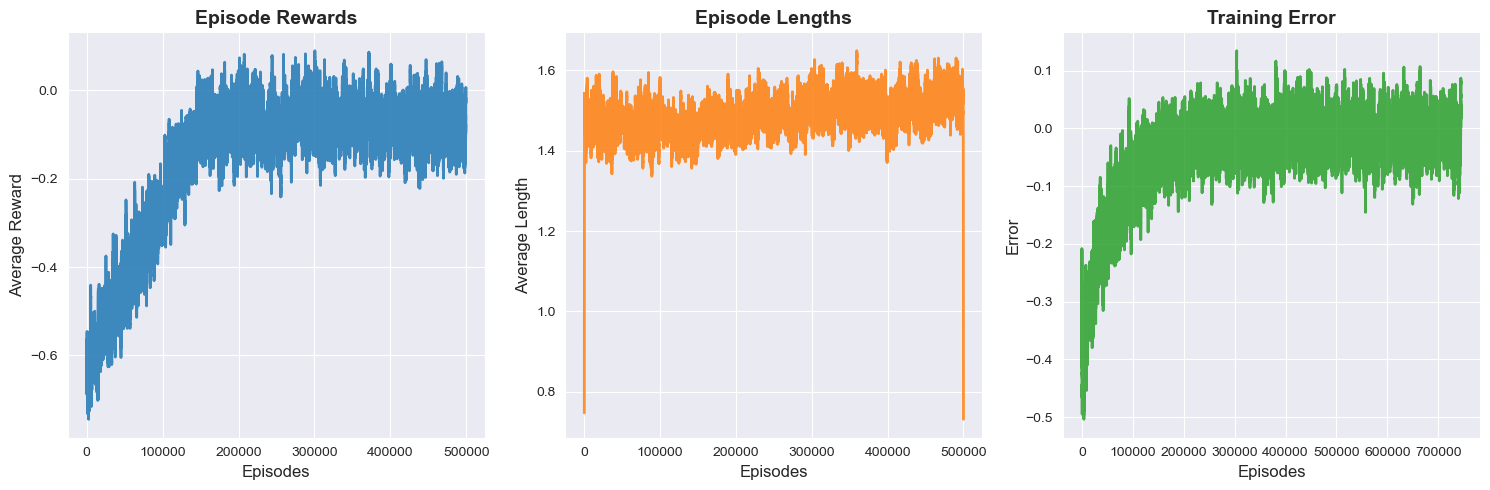

In [420]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Use a modern Seaborn style for better visuals
sns.set_style("darkgrid")

rolling_length = 500
fig, axs = plt.subplots(ncols=3, figsize=(15, 5))

# Use a modern color palette
colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]  # Blue, Orange, Green

# Episode Rewards
axs[0].set_title("Episode Rewards", fontsize=14, fontweight="bold")
reward_moving_average = np.convolve(
    np.array(env.return_queue).flatten(), np.ones(rolling_length), mode="valid"
) / rolling_length
axs[0].plot(range(len(reward_moving_average)), reward_moving_average, color=colors[0], lw=2, alpha=0.85)
axs[0].set_xlabel("Episodes", fontsize=12)
axs[0].set_ylabel("Average Reward", fontsize=12)

# Episode Lengths
axs[1].set_title("Episode Lengths", fontsize=14, fontweight="bold")
length_moving_average = np.convolve(
    np.array(env.length_queue).flatten(), np.ones(rolling_length), mode="same"
) / rolling_length
axs[1].plot(range(len(length_moving_average)), length_moving_average, color=colors[1], lw=2, alpha=0.85)
axs[1].set_xlabel("Episodes", fontsize=12)
axs[1].set_ylabel("Average Length", fontsize=12)

# Training Error
axs[2].set_title("Training Error", fontsize=14, fontweight="bold")

# Fix: Avoid empty array issues
training_error_array = np.array(agent.training_error)
if len(training_error_array) >= rolling_length:
    training_error_moving_average = np.convolve(training_error_array, np.ones(rolling_length), mode="same") / rolling_length
    axs[2].plot(range(len(training_error_moving_average)), training_error_moving_average, color=colors[2], lw=2, alpha=0.85)
else:
    axs[2].plot(range(len(training_error_array)), training_error_array, color=colors[2], lw=2, alpha=0.85)

axs[2].set_xlabel("Episodes", fontsize=12)
axs[2].set_ylabel("Error", fontsize=12)

# Better layout and spacing
plt.tight_layout()
plt.show()

Found states: 100
Total missing states: 0
Policy Grid Scaling: min=0, max=4


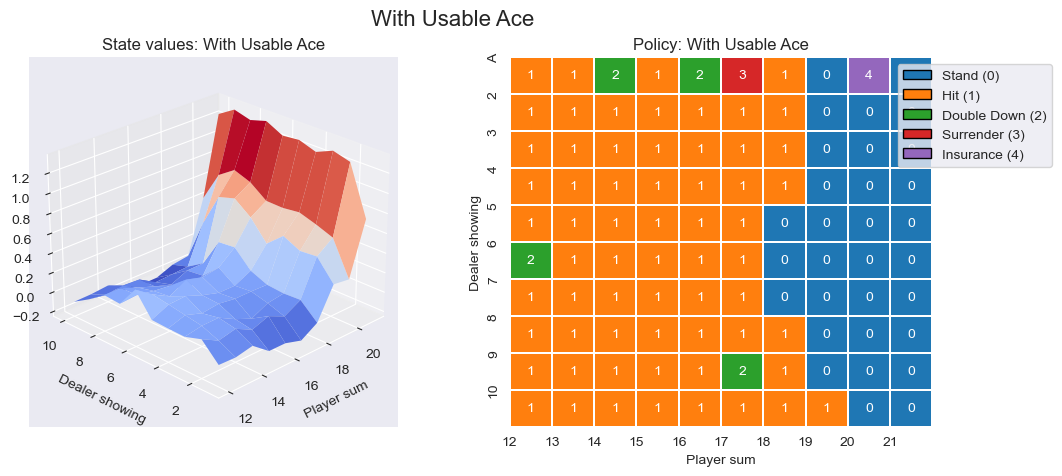

Found states: 100
Total missing states: 0
Policy Grid Scaling: min=0, max=4


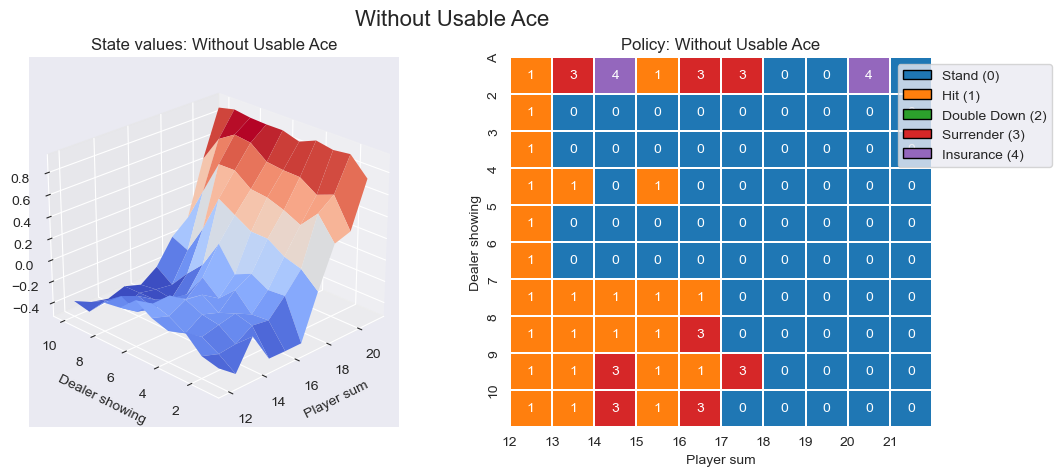

In [422]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.patches import Patch
from collections import defaultdict
from matplotlib.colors import ListedColormap

def create_grids(agent, usable_ace=False):
    """Create value and policy grids given an agent with multiple actions."""
    state_value = defaultdict(lambda: 0.0)
    policy = defaultdict(lambda: 0)  

    usable_ace = int(usable_ace)  

    for obs, action_values in agent.q_values.items():
        state_value[(obs[0], obs[1], obs[2])] = float(np.max(action_values))  
        policy[(obs[0], obs[1], obs[2])] = int(np.random.choice(np.flatnonzero(action_values == action_values.max())))  

    player_count, dealer_count = np.meshgrid(
        np.arange(12, 22),  
        np.arange(1, 11),   
    )

    missing_states = []
    found_states = 0

    value = np.apply_along_axis(
        lambda obs: state_value.get((obs[0], obs[1], usable_ace), 0),
        axis=2,
        arr=np.dstack([player_count, dealer_count]),
    )
    
    policy_grid = np.apply_along_axis(
        lambda obs: policy.get((obs[0], obs[1], usable_ace), 0),
        axis=2,
        arr=np.dstack([player_count, dealer_count]),
    )


    for i in range(12, 22):
        for j in range(1, 11):
            if (i, j, usable_ace) not in state_value:
                missing_states.append((i, j, usable_ace))
            else:
                found_states += 1

    print(f"Found states: {found_states}")
    print(f"Total missing states: {len(missing_states)}")
    if missing_states:
        print("Example missing states:", missing_states[:5])

    return player_count, dealer_count, value, policy_grid, policy

def create_plots(value_grid, policy_grid, title: str):
    """Creates a plot using a value and policy grid."""
    player_count, dealer_count, value = value_grid
    fig = plt.figure(figsize=plt.figaspect(0.4))
    fig.suptitle(title, fontsize=16)

    ax1 = fig.add_subplot(1, 2, 1, projection="3d")
    ax1.plot_surface(
        player_count,
        dealer_count,
        value,
        rstride=1,
        cstride=1,
        cmap="coolwarm",
        edgecolor="none",
    )
    ax1.set_title(f"State values: {title}")
    ax1.set_xlabel("Player sum")
    ax1.set_ylabel("Dealer showing")
    ax1.zaxis.set_rotate_label(False)
    ax1.set_zlabel("Value", fontsize=12, rotation=90)
    ax1.view_init(25, 225)

    print(f"Policy Grid Scaling: min={np.min(policy_grid)}, max={np.max(policy_grid)}")

    ax2 = fig.add_subplot(1, 2, 2)
    
    # ✅ Updated colormap (Adding Double Down, Surrender, and Insurance)
    action_colors = ["#1f77b4",  # Soft Blue (Stand)
                     "#ff7f0e",  # Vivid Orange (Hit)
                     "#2ca02c",  # Bright Green (Double Down)
                     "#d62728",  # Bold Red (Surrender)
                     "#9467bd"]  # Purple (Insurance)
    
    cmap = ListedColormap(action_colors)
    
    # ✅ Updated Action Labels (Includes Double Down, Surrender, and Insurance)
    action_labels = ["Stand (0)", "Hit (1)", "Double Down (2)", "Surrender (3)", "Insurance (4)"]

    heatmap = sns.heatmap(
        policy_grid, linewidth=0.3, annot=True, fmt="d",
        cmap=cmap, cbar=False, annot_kws={"size": 10},
        vmin=0, vmax=4  # ✅ Updated range (0-3, no Insurance)
    )
    
    ax2.set_title(f"Policy: {title}")
    ax2.set_xlabel("Player sum")
    ax2.set_ylabel("Dealer showing")

    ax2.set_xticks(np.arange(10))
    ax2.set_xticklabels(range(12, 22), fontsize=10)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(["A"] + list(range(2, 11)), fontsize=10)

    # Fixed legend (Insurance removed)
    legend_patches = [Patch(facecolor=action_colors[i], edgecolor="black", label=action_labels[i]) for i in range(5)]
    ax2.legend(handles=legend_patches, bbox_to_anchor=(1.3, 1))

    return fig
    
# State values & policy with usable ace (ace counts as 11)
player_count, dealer_count, value_grid, policy_grid, policy = create_grids(agent, usable_ace=True)
fig1 = create_plots((player_count, dealer_count, value_grid), policy_grid, title="With Usable Ace")
plt.show()

# State values & policy without usable ace
player_count, dealer_count, value_grid, policy_grid, policy = create_grids(agent, usable_ace=False)
fig2 = create_plots((player_count, dealer_count, value_grid), policy_grid, title="Without Usable Ace")
plt.show()

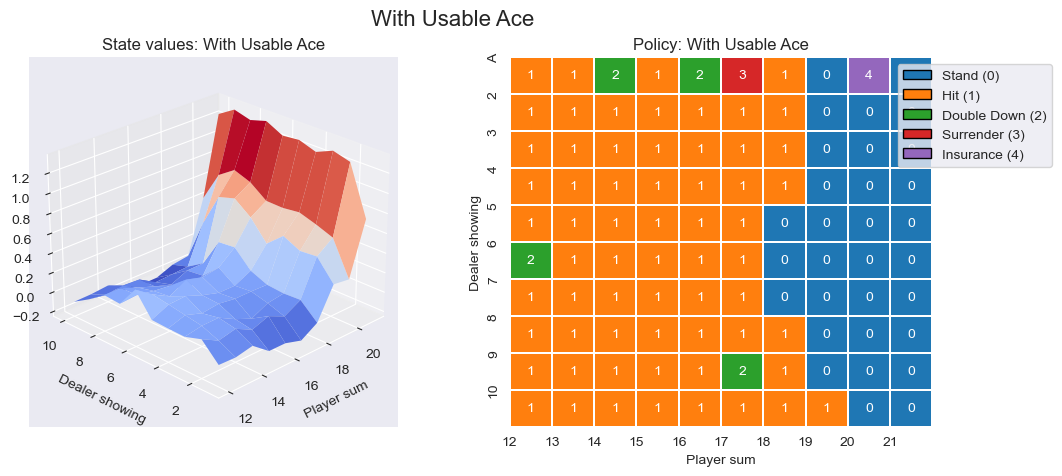

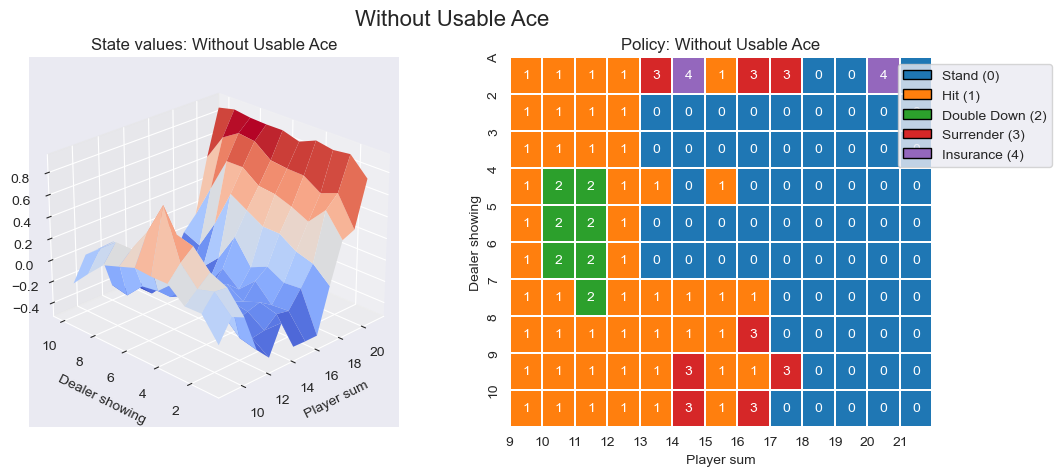

In [424]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.patches import Patch
from collections import defaultdict
from matplotlib.colors import ListedColormap

def create_grids(agent, usable_ace=False):
    """Create value and policy grids given an agent with multiple actions."""
    state_value = defaultdict(lambda: 0.0)
    policy = defaultdict(lambda: 0)  

    usable_ace = int(usable_ace)

    for obs, action_values in agent.q_values.items():
        state_value[(obs[0], obs[1], obs[2])] = float(np.max(action_values))  
        policy[(obs[0], obs[1], obs[2])] = int(np.random.choice(np.flatnonzero(action_values == action_values.max())))  

    # ✅ Adjust range based on usable ace condition
    player_min = 12 if usable_ace else 9
    player_max = 21  

    player_count, dealer_count = np.meshgrid(
        np.arange(player_min, player_max + 1),  
        np.arange(1, 11),   
    )

    value = np.apply_along_axis(
        lambda obs: state_value.get((obs[0], obs[1], usable_ace), 0),
        axis=2,
        arr=np.dstack([player_count, dealer_count]),
    )
    
    policy_grid = np.apply_along_axis(
        lambda obs: policy.get((obs[0], obs[1], usable_ace), 0),
        axis=2,
        arr=np.dstack([player_count, dealer_count]),
    )

    return player_count, dealer_count, value, policy_grid, policy

def create_plots(value_grid, policy_grid, title: str, player_min, player_max):
    """Creates a plot using a value and policy grid."""
    player_count, dealer_count, value = value_grid
    fig = plt.figure(figsize=plt.figaspect(0.4))
    fig.suptitle(title, fontsize=16)

    ax1 = fig.add_subplot(1, 2, 1, projection="3d")
    ax1.plot_surface(
        player_count,
        dealer_count,
        value,
        rstride=1,
        cstride=1,
        cmap="coolwarm",
        edgecolor="none",
    )
    ax1.set_title(f"State values: {title}")
    ax1.set_xlabel("Player sum")
    ax1.set_ylabel("Dealer showing")
    ax1.zaxis.set_rotate_label(False)
    ax1.set_zlabel("Value", fontsize=12, rotation=90)
    ax1.view_init(25, 225)

    ax2 = fig.add_subplot(1, 2, 2)
    
    # ✅ Updated colormap (Adding Double Down, Surrender, and Insurance)
    action_colors = ["#1f77b4",  # Soft Blue (Stand)
                     "#ff7f0e",  # Vivid Orange (Hit)
                     "#2ca02c",  # Bright Green (Double Down)
                     "#d62728",  # Bold Red (Surrender)
                     "#9467bd"]  # Purple (Insurance)
    
    cmap = ListedColormap(action_colors)
    
    # ✅ Updated Action Labels (Includes Double Down, Surrender, and Insurance)
    action_labels = ["Stand (0)", "Hit (1)", "Double Down (2)", "Surrender (3)", "Insurance (4)"]

    heatmap = sns.heatmap(
        policy_grid, linewidth=0.3, annot=True, fmt="d",
        cmap=cmap, cbar=False, annot_kws={"size": 10},
        vmin=0, vmax=4  # ✅ Updated range (0-4)
    )
    
    ax2.set_title(f"Policy: {title}")
    ax2.set_xlabel("Player sum")
    ax2.set_ylabel("Dealer showing")

    # ✅ Updated X and Y ticks based on `player_min` and `player_max`
    ax2.set_xticks(np.arange(player_max - player_min + 1))  
    ax2.set_xticklabels(range(player_min, player_max + 1), fontsize=10)

    ax2.set_yticks(np.arange(10))  
    ax2.set_yticklabels(["A"] + list(range(2, 11)), fontsize=10)  # ✅ Dealer cards: A, 2-10

    # ✅ Updated Legend
    legend_patches = [Patch(facecolor=action_colors[i], edgecolor="black", label=action_labels[i]) for i in range(5)]
    ax2.legend(handles=legend_patches, bbox_to_anchor=(1.3, 1))

    return fig
    
# ✅ State values & policy with usable ace (12-21)
player_count, dealer_count, value_grid, policy_grid, policy = create_grids(agent, usable_ace=True)
fig1 = create_plots((player_count, dealer_count, value_grid), policy_grid, title="With Usable Ace", player_min=12, player_max=21)
plt.show()

# ✅ State values & policy without usable ace (9-21)
player_count, dealer_count, value_grid, policy_grid, policy = create_grids(agent, usable_ace=False)
fig2 = create_plots((player_count, dealer_count, value_grid), policy_grid, title="Without Usable Ace", player_min=9, player_max=21)
plt.show()

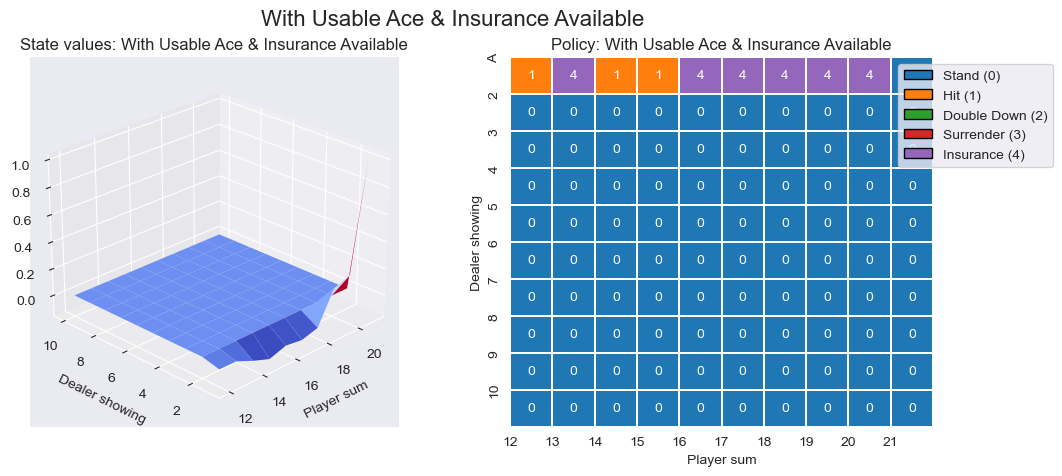

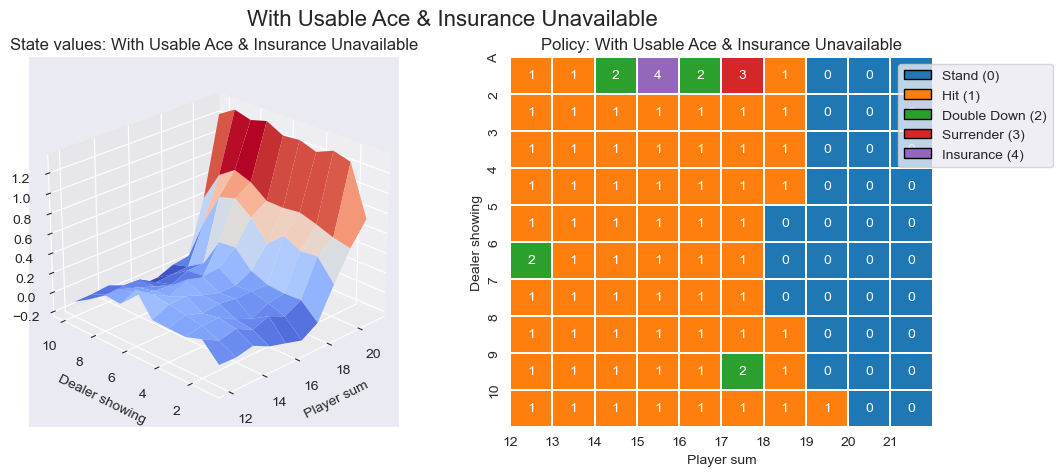

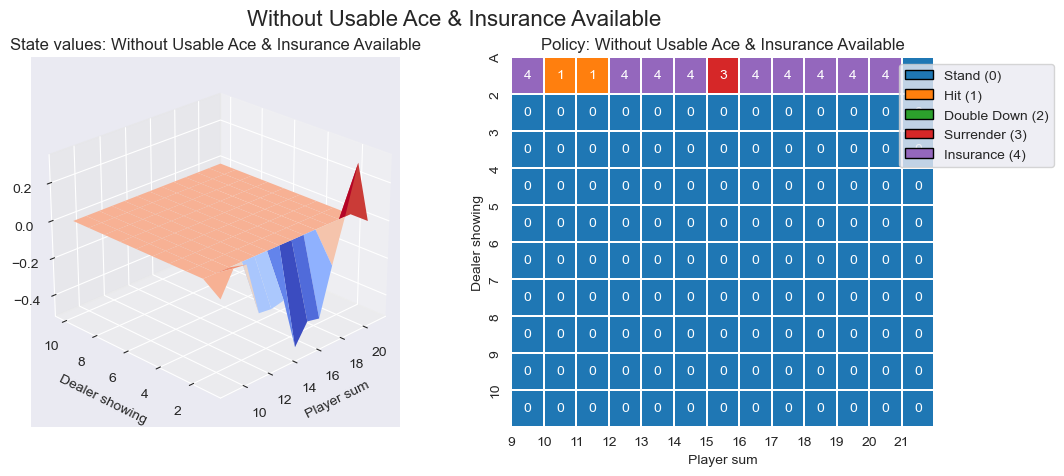

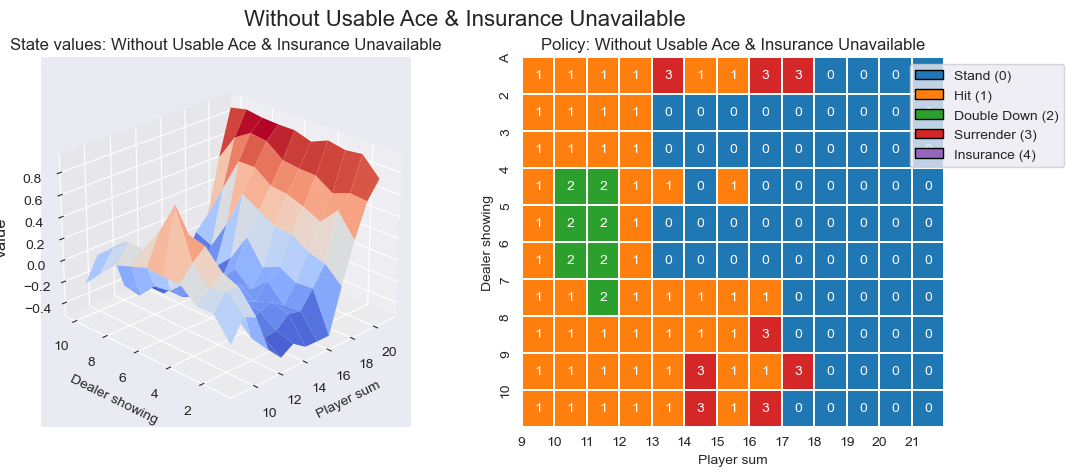

In [425]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.patches import Patch
from collections import defaultdict
from matplotlib.colors import ListedColormap

def create_grids(agent, usable_ace=False, insurance_available=False):
    """Create value and policy grids given an agent with multiple actions."""
    state_value = defaultdict(lambda: 0.0)
    policy = defaultdict(lambda: 0)  

    usable_ace = int(usable_ace)
    insurance_available = int(insurance_available)  # Ensure boolean is converted to int for key consistency

    for obs, action_values in agent.q_values.items():
        state_key = (obs[0], obs[1], obs[2], obs[3])  # Full state tuple
        state_value[state_key] = float(np.max(action_values))  # Store max Q-value
        policy[state_key] = int(np.argmax(action_values))  # Select best action deterministically

    # ✅ Adjust player sum range based on usable ace condition
    player_min = 12 if usable_ace else 9
    player_max = 21  

    player_count, dealer_count = np.meshgrid(
        np.arange(player_min, player_max + 1),  
        np.arange(1, 11),   
    )

    value = np.apply_along_axis(
        lambda obs: state_value.get((obs[0], obs[1], usable_ace, insurance_available), 0),
        axis=2,
        arr=np.dstack([player_count, dealer_count]),
    )
    
    policy_grid = np.apply_along_axis(
        lambda obs: policy.get((obs[0], obs[1], usable_ace, insurance_available), 0),
        axis=2,
        arr=np.dstack([player_count, dealer_count]),
    )

    return player_count, dealer_count, value, policy_grid, policy

def create_plots(value_grid, policy_grid, title: str, player_min, player_max):
    """Creates a plot using a value and policy grid."""
    player_count, dealer_count, value = value_grid
    fig = plt.figure(figsize=plt.figaspect(0.4))
    fig.suptitle(title, fontsize=16)

    ax1 = fig.add_subplot(1, 2, 1, projection="3d")
    ax1.plot_surface(
        player_count,
        dealer_count,
        value,
        rstride=1,
        cstride=1,
        cmap="coolwarm",
        edgecolor="none",
    )
    ax1.set_title(f"State values: {title}")
    ax1.set_xlabel("Player sum")
    ax1.set_ylabel("Dealer showing")
    ax1.zaxis.set_rotate_label(False)
    ax1.set_zlabel("Value", fontsize=12, rotation=90)
    ax1.view_init(25, 225)

    ax2 = fig.add_subplot(1, 2, 2)
    
    # ✅ Updated colormap (Adding Double Down, Surrender, and Insurance)
    action_colors = ["#1f77b4",  # Soft Blue (Stand)
                     "#ff7f0e",  # Vivid Orange (Hit)
                     "#2ca02c",  # Bright Green (Double Down)
                     "#d62728",  # Bold Red (Surrender)
                     "#9467bd"]  # Purple (Insurance)
    
    cmap = ListedColormap(action_colors)
    
    # ✅ Updated Action Labels (Includes Double Down, Surrender, and Insurance)
    action_labels = ["Stand (0)", "Hit (1)", "Double Down (2)", "Surrender (3)", "Insurance (4)"]

    heatmap = sns.heatmap(
        policy_grid, linewidth=0.3, annot=True, fmt="d",
        cmap=cmap, cbar=False, annot_kws={"size": 10},
        vmin=0, vmax=4  # ✅ Updated range (0-4)
    )
    
    ax2.set_title(f"Policy: {title}")
    ax2.set_xlabel("Player sum")
    ax2.set_ylabel("Dealer showing")

    # ✅ Updated X and Y ticks based on `player_min` and `player_max`
    ax2.set_xticks(np.arange(player_max - player_min + 1))  
    ax2.set_xticklabels(range(player_min, player_max + 1), fontsize=10)

    ax2.set_yticks(np.arange(10))  
    ax2.set_yticklabels(["A"] + list(range(2, 11)), fontsize=10)  # ✅ Dealer cards: A, 2-10

    # ✅ Updated Legend
    legend_patches = [Patch(facecolor=action_colors[i], edgecolor="black", label=action_labels[i]) for i in range(5)]
    ax2.legend(handles=legend_patches, bbox_to_anchor=(1.3, 1))

    return fig
    
# ✅ State values & policy with With Usable Ace & Insurance Available (12-21)
player_count, dealer_count, value_grid, policy_grid, policy = create_grids(agent, usable_ace=True, insurance_available=1)
fig1 = create_plots((player_count, dealer_count, value_grid), policy_grid, title="With Usable Ace & Insurance Available", player_min=12, player_max=21)
plt.show()

# ✅ State values & policy with With Usable Ace & Insurance Unavailable (12-21)
player_count, dealer_count, value_grid, policy_grid, policy = create_grids(agent, usable_ace=True, insurance_available=0)
fig2 = create_plots((player_count, dealer_count, value_grid), policy_grid, title="With Usable Ace & Insurance Unavailable", player_min=12, player_max=21)
plt.show()

# ✅ State values & policy without Without Usable Ace & Insurance Available (9-21)
player_count, dealer_count, value_grid, policy_grid, policy = create_grids(agent, usable_ace=False, insurance_available=1)
fig3 = create_plots((player_count, dealer_count, value_grid), policy_grid, title="Without Usable Ace & Insurance Available", player_min=9, player_max=21)
plt.show()

# ✅ State values & policy without Without Usable Ace & Insurance Unavailable (9-21)
player_count, dealer_count, value_grid, policy_grid, policy = create_grids(agent, usable_ace=False, insurance_available=0)
fig4 = create_plots((player_count, dealer_count, value_grid), policy_grid, title="Without Usable Ace & Insurance Unavailable", player_min=9, player_max=21)
plt.show()

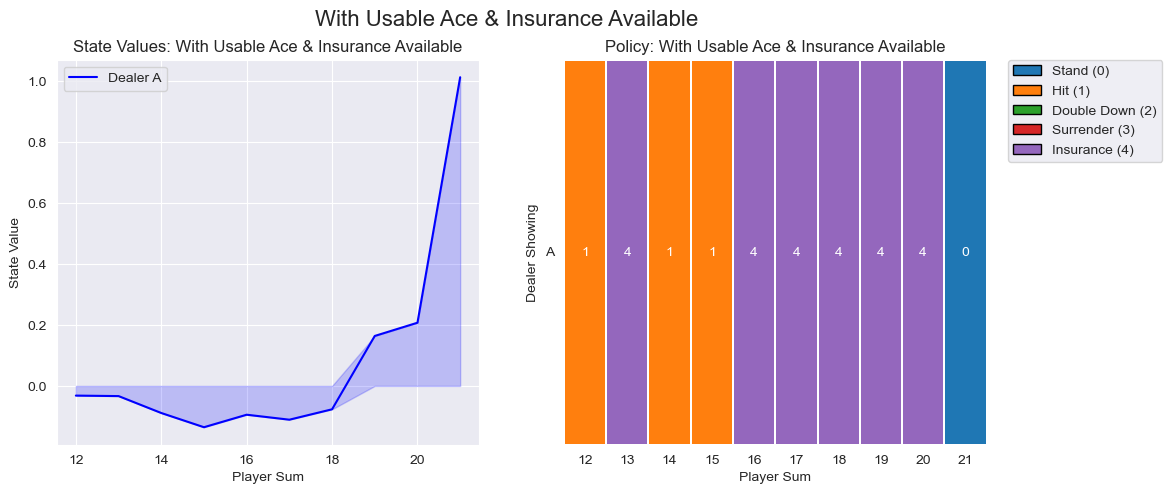

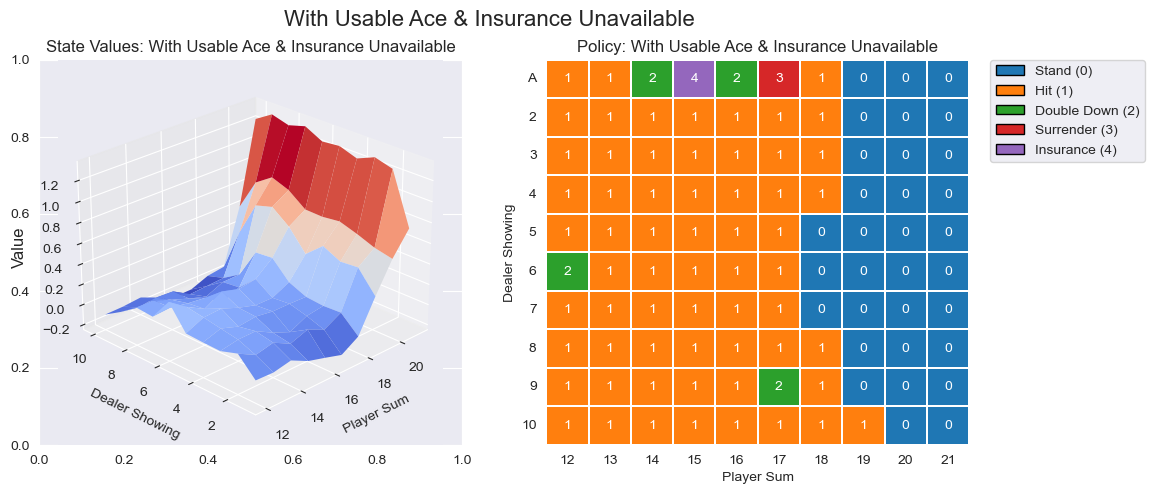

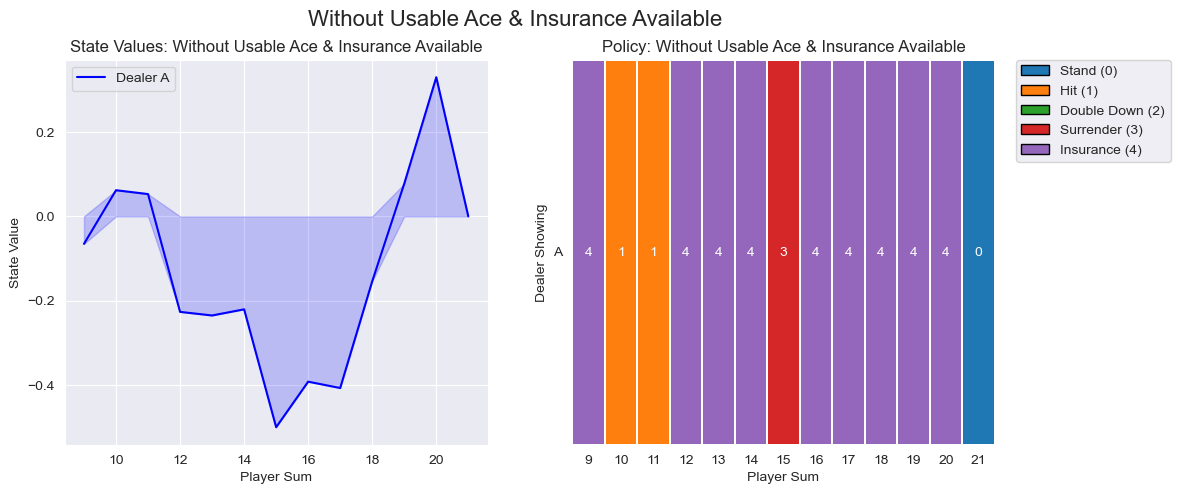

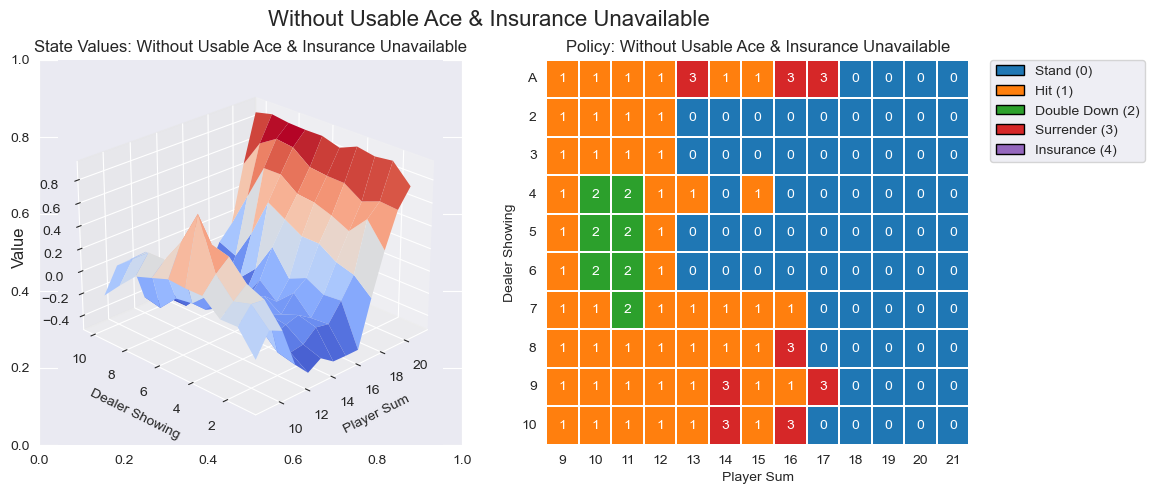

In [428]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap
import matplotlib.cm as cm  # Import colormap utilities

def create_grids(agent, usable_ace=False, insurance_available=False):
    """Create value and policy grids given an agent with multiple actions."""
    state_value = defaultdict(lambda: 0.0)
    policy = defaultdict(lambda: 0)  

    usable_ace = int(usable_ace)
    insurance_available = int(insurance_available)  # Ensure boolean is converted to int for key consistency

    for obs, action_values in agent.q_values.items():
        state_key = (obs[0], obs[1], obs[2], obs[3])  # Full state tuple
        state_value[state_key] = float(np.max(action_values))  # Store max Q-value
        policy[state_key] = int(np.argmax(action_values))  # Select best action deterministically

    # ✅ Adjust player sum range based on usable ace condition
    player_min = 12 if usable_ace else 9
    player_max = 21  

    player_count, dealer_count = np.meshgrid(
        np.arange(player_min, player_max + 1),  
        np.arange(1, 11),   
    )

    value = np.apply_along_axis(
        lambda obs: state_value.get((obs[0], obs[1], usable_ace, insurance_available), 0),
        axis=2,
        arr=np.dstack([player_count, dealer_count]),
    )
    
    policy_grid = np.apply_along_axis(
        lambda obs: policy.get((obs[0], obs[1], usable_ace, insurance_available), 0),
        axis=2,
        arr=np.dstack([player_count, dealer_count]),
    )

    return player_count, dealer_count, value, policy_grid, policy


def create_plots(player_count, dealer_count, value, policy_grid, title: str, player_min, player_max, insurance_available):
    """Creates a plot with a line plot for values and a policy grid."""
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    fig.suptitle(title, fontsize=16)

    # ✅ Define Colors for Each Action (Ensuring Correct Order)
    action_colors = {
        0: "#1f77b4",  # Stand (Blue)
        1: "#ff7f0e",  # Hit (Orange)
        2: "#2ca02c",  # Double Down (Green)
        3: "#d62728",  # Surrender (Red)
        4: "#9467bd"   # Insurance (Purple)
    }
    cmap = ListedColormap([action_colors[i] for i in range(5)])  # Ensure proper mapping
    action_labels = ["Stand (0)", "Hit (1)", "Double Down (2)", "Surrender (3)", "Insurance (4)"]
    
    if insurance_available:
        # ✅ Left Plot: 2D Line Graph with Area Shading
        ax1 = axes[0]
        dealer_idx = 0  # Only plot values where dealer is showing Ace
        ax1.plot(
            np.arange(player_min, player_max + 1),
            value[dealer_idx, :],
            label="Dealer A",
            color="blue"
        )
        ax1.fill_between(np.arange(player_min, player_max + 1), np.min(value, axis=0), np.max(value, axis=0), alpha=0.2, color="blue")
        ax1.set_title(f"State Values: {title}")
        ax1.set_xlabel("Player Sum")
        ax1.set_ylabel("State Value")
        ax1.legend(["Dealer A"])

        # ✅ Right Plot: Policy Grid (Single Row for Insurance Available)
        ax2 = axes[1]
        policy_data = policy_grid[0, :].reshape(1, -1)  # Only row where dealer shows Ace
        sns.heatmap(policy_data, linewidth=0.3, annot=True, fmt="d",
                    cmap=cmap, cbar=False, ax=ax2,
                    xticklabels=np.arange(player_min, player_max + 1), yticklabels=["A"])
    else:
        # ✅ Left Plot: 3D Surface Plot
        ax1 = axes[0]
        ax1 = fig.add_subplot(1, 2, 1, projection="3d")
        ax1.plot_surface(
            player_count,
            dealer_count,
            value,
            rstride=1,
            cstride=1,
            cmap="coolwarm",
            edgecolor="none",
        )
        ax1.set_title(f"State Values: {title}")
        ax1.set_xlabel("Player Sum")
        ax1.set_ylabel("Dealer Showing")
        ax1.zaxis.set_rotate_label(False)
        ax1.set_zlabel("Value", fontsize=12, rotation=90)
        ax1.view_init(25, 225)

        # ✅ Right Plot: Full Policy Grid
        ax2 = axes[1]
        sns.heatmap(
            policy_grid, linewidth=0.3, annot=True, fmt="d",
            cmap=cmap, cbar=False, annot_kws={"size": 10}, ax=ax2,
            vmin=0, vmax=4,  # ✅ Ensure colors correctly map to actions
            xticklabels=np.arange(player_min, player_max + 1),
            yticklabels=["A"] + list(range(2, 11))
        )
        
    ax2.set_title(f"Policy: {title}")
    ax2.set_xlabel("Player Sum")
    ax2.set_ylabel("Dealer Showing")

    # ✅ Remove overlapping labels
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0, ha="center", fontsize=10)
    ax2.set_yticklabels(ax2.get_yticklabels(), rotation=0, ha="right", fontsize=10)
    
    # ✅ Fix Legend Placement (Prevents Overlapping)
    legend_patches = [Patch(facecolor=action_colors[i], edgecolor="black", label=action_labels[i]) for i in range(5)]
    ax2.legend(handles=legend_patches, loc="upper left", bbox_to_anchor=(1.05, 1), borderaxespad=0.)

    return fig

# ✅ Generate 4 plots based on conditions
player_count, dealer_count, value_grid, policy_grid, _ = create_grids(agent, usable_ace=True, insurance_available=1)
fig1 = create_plots(player_count, dealer_count, value_grid, policy_grid, title="With Usable Ace & Insurance Available", player_min=12, player_max=21, insurance_available=1)

player_count, dealer_count, value_grid, policy_grid, _ = create_grids(agent, usable_ace=True, insurance_available=0)
fig2 = create_plots(player_count, dealer_count, value_grid, policy_grid, title="With Usable Ace & Insurance Unavailable", player_min=12, player_max=21, insurance_available=0)

player_count, dealer_count, value_grid, policy_grid, _ = create_grids(agent, usable_ace=False, insurance_available=1)
fig3 = create_plots(player_count, dealer_count, value_grid, policy_grid, title="Without Usable Ace & Insurance Available", player_min=9, player_max=21, insurance_available=1)

player_count, dealer_count, value_grid, policy_grid, _ = create_grids(agent, usable_ace=False, insurance_available=0)
fig4 = create_plots(player_count, dealer_count, value_grid, policy_grid, title="Without Usable Ace & Insurance Unavailable", player_min=9, player_max=21, insurance_available=0)

plt.show()

In [430]:
import numpy as np

test_wins = 0
test_games = 10000  # ✅ Increase for better evaluation

for _ in range(test_games):
    obs, _ = env.reset()
    step_count = 0  # ✅ Track number of steps

    while step_count < 100:  # ✅ Safety limit to prevent infinite loops
        if obs in agent.q_values:
            action = np.argmax(agent.q_values[obs])  # ✅ Use best action
        else:
            action = env.action_space.sample()  # ✅ Random action if state unseen

        obs, reward, terminated, truncated, _ = env.step(action)
        step_count += 1  # ✅ Increment step counter
        
        if terminated or truncated:  # ✅ Stop if the episode ends
            break

    if reward > 0:  # ✅ Winning condition
        test_wins += 1

win_rate = test_wins / test_games
print(f"Win Rate after {test_games:,} simulated games: {win_rate:.3%}")

Win Rate after 10,000 simulated games: 41.130%


## Second Train [Better Model]

In [433]:
# Initialize environment FIRST
env = gym.make(env_id, natural=True)

# Training loop
n_episodes = 750_000  # ✅ Reduce if plateau occurs early
learning_rate = 0.005  # ✅ Slightly lower LR to stabilize learning
initial_epsilon = 1.0
epsilon_decay = 1.0 / (n_episodes / 2.5)  # ✅ Slower decay for better early exploration
final_epsilon = 0.05  # ✅ More exploitation in the later phase

agent = BlackjackAgent(
    env=env,
    learning_rate=learning_rate,
    initial_epsilon=initial_epsilon, 
    epsilon_decay=epsilon_decay,
    final_epsilon=final_epsilon,
)

env = gym.wrappers.RecordEpisodeStatistics(env, buffer_length=n_episodes)
for episode in tqdm(range(n_episodes)):
    obs, info = env.reset()
    done = False

    while not done:
        action = agent.get_action(env, obs, info)
        next_obs, reward, terminated, truncated, info = env.step(action)

        agent.update(obs, action, reward, terminated, next_obs)

        done = terminated or truncated
        obs = next_obs

    agent.decay_epsilon()

100%|██████████| 750000/750000 [01:07<00:00, 11085.83it/s]


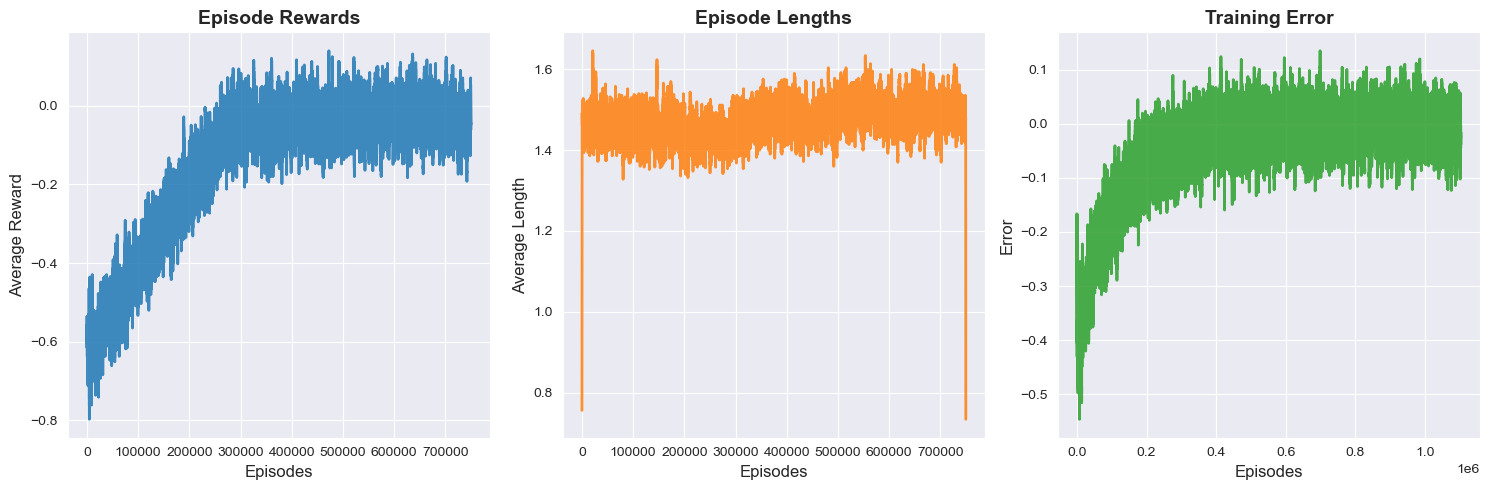

In [434]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Use a modern Seaborn style for better visuals
sns.set_style("darkgrid")

rolling_length = 500
fig, axs = plt.subplots(ncols=3, figsize=(15, 5))

# Use a modern color palette
colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]  # Blue, Orange, Green

# Episode Rewards
axs[0].set_title("Episode Rewards", fontsize=14, fontweight="bold")
reward_moving_average = np.convolve(
    np.array(env.return_queue).flatten(), np.ones(rolling_length), mode="valid"
) / rolling_length
axs[0].plot(range(len(reward_moving_average)), reward_moving_average, color=colors[0], lw=2, alpha=0.85)
axs[0].set_xlabel("Episodes", fontsize=12)
axs[0].set_ylabel("Average Reward", fontsize=12)

# Episode Lengths
axs[1].set_title("Episode Lengths", fontsize=14, fontweight="bold")
length_moving_average = np.convolve(
    np.array(env.length_queue).flatten(), np.ones(rolling_length), mode="same"
) / rolling_length
axs[1].plot(range(len(length_moving_average)), length_moving_average, color=colors[1], lw=2, alpha=0.85)
axs[1].set_xlabel("Episodes", fontsize=12)
axs[1].set_ylabel("Average Length", fontsize=12)

# Training Error
axs[2].set_title("Training Error", fontsize=14, fontweight="bold")

# Fix: Avoid empty array issues
training_error_array = np.array(agent.training_error)
if len(training_error_array) >= rolling_length:
    training_error_moving_average = np.convolve(training_error_array, np.ones(rolling_length), mode="same") / rolling_length
    axs[2].plot(range(len(training_error_moving_average)), training_error_moving_average, color=colors[2], lw=2, alpha=0.85)
else:
    axs[2].plot(range(len(training_error_array)), training_error_array, color=colors[2], lw=2, alpha=0.85)

axs[2].set_xlabel("Episodes", fontsize=12)
axs[2].set_ylabel("Error", fontsize=12)

# Better layout and spacing
plt.tight_layout()
plt.show()

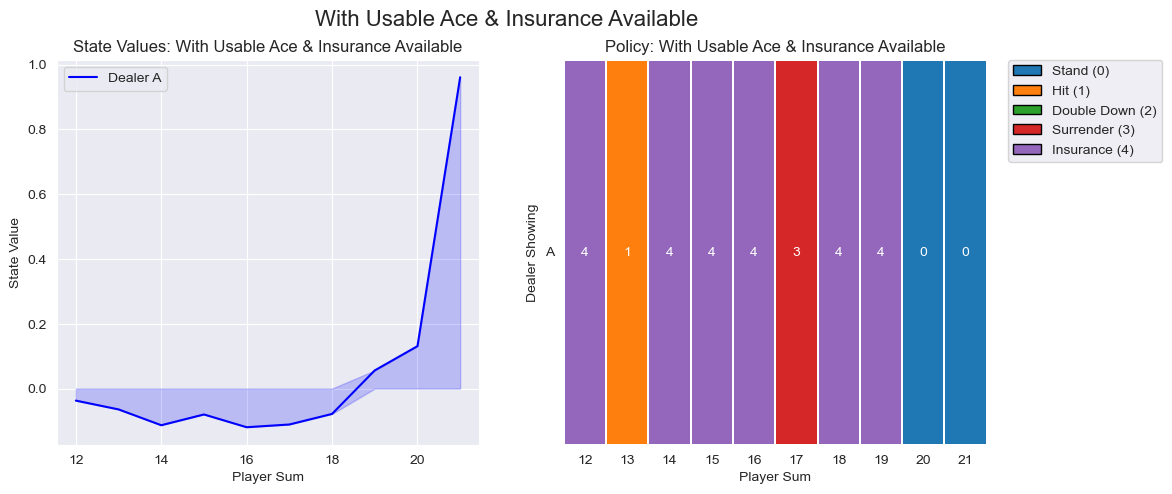

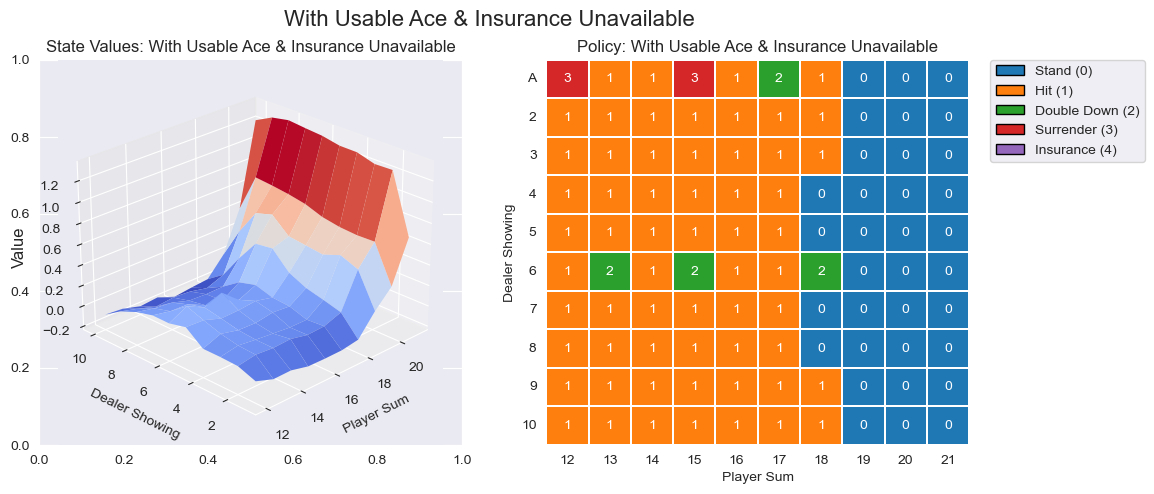

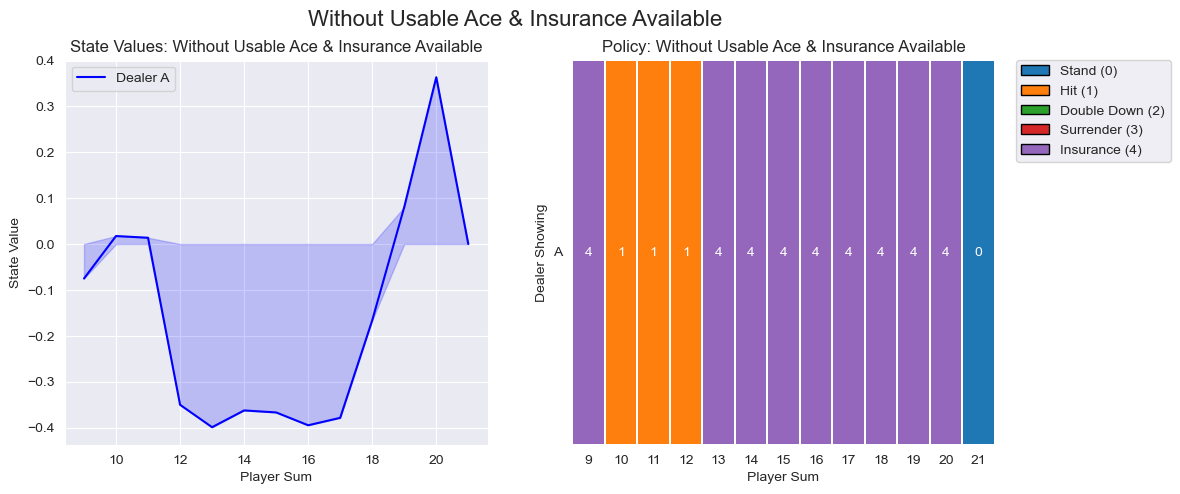

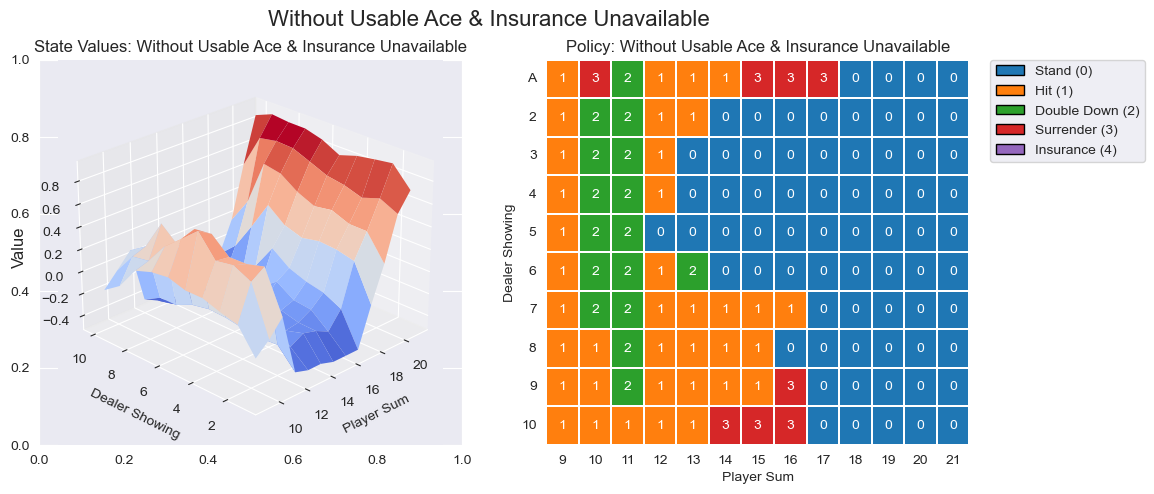

In [435]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap
import matplotlib.cm as cm  # Import colormap utilities

def create_grids(agent, usable_ace=False, insurance_available=False):
    """Create value and policy grids given an agent with multiple actions."""
    state_value = defaultdict(lambda: 0.0)
    policy = defaultdict(lambda: 0)  

    usable_ace = int(usable_ace)
    insurance_available = int(insurance_available)  # Ensure boolean is converted to int for key consistency

    for obs, action_values in agent.q_values.items():
        state_key = (obs[0], obs[1], obs[2], obs[3])  # Full state tuple
        state_value[state_key] = float(np.max(action_values))  # Store max Q-value
        policy[state_key] = int(np.argmax(action_values))  # Select best action deterministically

    # ✅ Adjust player sum range based on usable ace condition
    player_min = 12 if usable_ace else 9
    player_max = 21  

    player_count, dealer_count = np.meshgrid(
        np.arange(player_min, player_max + 1),  
        np.arange(1, 11),   
    )

    value = np.apply_along_axis(
        lambda obs: state_value.get((obs[0], obs[1], usable_ace, insurance_available), 0),
        axis=2,
        arr=np.dstack([player_count, dealer_count]),
    )
    
    policy_grid = np.apply_along_axis(
        lambda obs: policy.get((obs[0], obs[1], usable_ace, insurance_available), 0),
        axis=2,
        arr=np.dstack([player_count, dealer_count]),
    )

    return player_count, dealer_count, value, policy_grid, policy


def create_plots(player_count, dealer_count, value, policy_grid, title: str, player_min, player_max, insurance_available):
    """Creates a plot with a line plot for values and a policy grid."""
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    fig.suptitle(title, fontsize=16)

    # ✅ Define Colors for Each Action (Ensuring Correct Order)
    action_colors = {
        0: "#1f77b4",  # Stand (Blue)
        1: "#ff7f0e",  # Hit (Orange)
        2: "#2ca02c",  # Double Down (Green)
        3: "#d62728",  # Surrender (Red)
        4: "#9467bd"   # Insurance (Purple)
    }
    cmap = ListedColormap([action_colors[i] for i in range(5)])  # Ensure proper mapping
    action_labels = ["Stand (0)", "Hit (1)", "Double Down (2)", "Surrender (3)", "Insurance (4)"]
    
    if insurance_available:
        # ✅ Left Plot: 2D Line Graph with Area Shading
        ax1 = axes[0]
        dealer_idx = 0  # Only plot values where dealer is showing Ace
        ax1.plot(
            np.arange(player_min, player_max + 1),
            value[dealer_idx, :],
            label="Dealer A",
            color="blue"
        )
        ax1.fill_between(np.arange(player_min, player_max + 1), np.min(value, axis=0), np.max(value, axis=0), alpha=0.2, color="blue")
        ax1.set_title(f"State Values: {title}")
        ax1.set_xlabel("Player Sum")
        ax1.set_ylabel("State Value")
        ax1.legend(["Dealer A"])

        # ✅ Right Plot: Policy Grid (Single Row for Insurance Available)
        ax2 = axes[1]
        policy_data = policy_grid[0, :].reshape(1, -1)  # Only row where dealer shows Ace
        sns.heatmap(policy_data, linewidth=0.3, annot=True, fmt="d",
                    cmap=cmap, cbar=False, ax=ax2,
                    xticklabels=np.arange(player_min, player_max + 1), yticklabels=["A"])
    else:
        # ✅ Left Plot: 3D Surface Plot
        ax1 = axes[0]
        ax1 = fig.add_subplot(1, 2, 1, projection="3d")
        ax1.plot_surface(
            player_count,
            dealer_count,
            value,
            rstride=1,
            cstride=1,
            cmap="coolwarm",
            edgecolor="none",
        )
        ax1.set_title(f"State Values: {title}")
        ax1.set_xlabel("Player Sum")
        ax1.set_ylabel("Dealer Showing")
        ax1.zaxis.set_rotate_label(False)
        ax1.set_zlabel("Value", fontsize=12, rotation=90)
        ax1.view_init(25, 225)

        # ✅ Right Plot: Full Policy Grid
        ax2 = axes[1]
        sns.heatmap(
            policy_grid, linewidth=0.3, annot=True, fmt="d",
            cmap=cmap, cbar=False, annot_kws={"size": 10}, ax=ax2,
            vmin=0, vmax=4,  # ✅ Ensure colors correctly map to actions
            xticklabels=np.arange(player_min, player_max + 1),
            yticklabels=["A"] + list(range(2, 11))
        )
        
    ax2.set_title(f"Policy: {title}")
    ax2.set_xlabel("Player Sum")
    ax2.set_ylabel("Dealer Showing")

    # ✅ Remove overlapping labels
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0, ha="center", fontsize=10)
    ax2.set_yticklabels(ax2.get_yticklabels(), rotation=0, ha="right", fontsize=10)
    
    # ✅ Fix Legend Placement (Prevents Overlapping)
    legend_patches = [Patch(facecolor=action_colors[i], edgecolor="black", label=action_labels[i]) for i in range(5)]
    ax2.legend(handles=legend_patches, loc="upper left", bbox_to_anchor=(1.05, 1), borderaxespad=0.)

    return fig

# ✅ Generate 4 plots based on conditions
player_count, dealer_count, value_grid, policy_grid, _ = create_grids(agent, usable_ace=True, insurance_available=1)
fig1 = create_plots(player_count, dealer_count, value_grid, policy_grid, title="With Usable Ace & Insurance Available", player_min=12, player_max=21, insurance_available=1)

player_count, dealer_count, value_grid, policy_grid, _ = create_grids(agent, usable_ace=True, insurance_available=0)
fig2 = create_plots(player_count, dealer_count, value_grid, policy_grid, title="With Usable Ace & Insurance Unavailable", player_min=12, player_max=21, insurance_available=0)

player_count, dealer_count, value_grid, policy_grid, _ = create_grids(agent, usable_ace=False, insurance_available=1)
fig3 = create_plots(player_count, dealer_count, value_grid, policy_grid, title="Without Usable Ace & Insurance Available", player_min=9, player_max=21, insurance_available=1)

player_count, dealer_count, value_grid, policy_grid, _ = create_grids(agent, usable_ace=False, insurance_available=0)
fig4 = create_plots(player_count, dealer_count, value_grid, policy_grid, title="Without Usable Ace & Insurance Unavailable", player_min=9, player_max=21, insurance_available=0)

plt.show()

In [436]:
import numpy as np

test_wins = 0
test_games = 10000  # ✅ Increase for better evaluation

for _ in range(test_games):
    obs, _ = env.reset()
    step_count = 0  # ✅ Track number of steps

    while step_count < 100:  # ✅ Safety limit to prevent infinite loops
        if obs in agent.q_values:
            action = np.argmax(agent.q_values[obs])  # ✅ Use best action
        else:
            action = env.action_space.sample()  # ✅ Random action if state unseen

        obs, reward, terminated, truncated, _ = env.step(action)
        step_count += 1  # ✅ Increment step counter
        
        if terminated or truncated:  # ✅ Stop if the episode ends
            break

    if reward > 0:  # ✅ Winning condition
        test_wins += 1

win_rate = test_wins / test_games
print(f"Win Rate after {test_games:,} simulated games: {win_rate:.3%}")

Win Rate after 10,000 simulated games: 41.200%


## Third Train

In [441]:
# Initialize environment FIRST
env = gym.make(env_id, natural=True)

# Training loop
n_episodes = 1_000_000  # ✅ Increased for better convergence
learning_rate = 0.003  # ✅ Slightly reduced to avoid instability
initial_epsilon = 1.0
epsilon_decay = 1.0 / (n_episodes / 3)  # ✅ Balanced exploration-exploitation tradeoff
final_epsilon = 0.02  # ✅ Ensures exploitation in later training

agent = BlackjackAgent(
    env=env,
    learning_rate=learning_rate,
    initial_epsilon=initial_epsilon, 
    epsilon_decay=epsilon_decay,
    final_epsilon=final_epsilon,
)

env = gym.wrappers.RecordEpisodeStatistics(env, buffer_length=n_episodes)
for episode in tqdm(range(n_episodes)):
    obs, info = env.reset()
    done = False

    while not done:
        action = agent.get_action(env, obs, info)
        next_obs, reward, terminated, truncated, info = env.step(action)

        agent.update(obs, action, reward, terminated, next_obs)

        done = terminated or truncated
        obs = next_obs

    agent.decay_epsilon()

100%|██████████| 1000000/1000000 [01:33<00:00, 10709.95it/s]


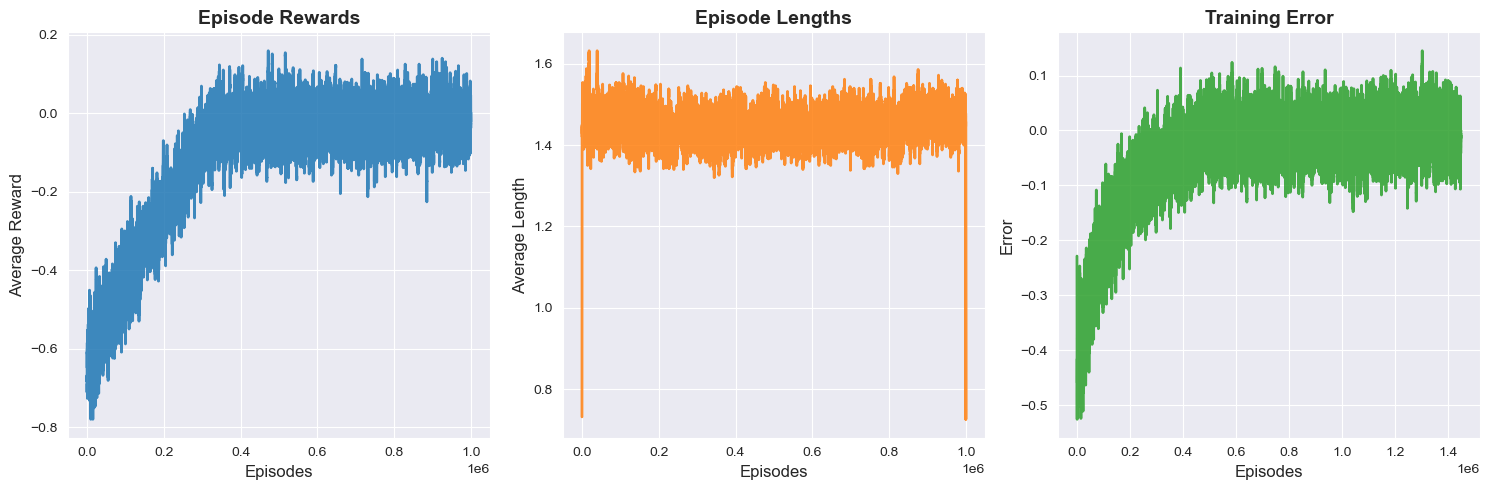

In [442]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Use a modern Seaborn style for better visuals
sns.set_style("darkgrid")

rolling_length = 500
fig, axs = plt.subplots(ncols=3, figsize=(15, 5))

# Use a modern color palette
colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]  # Blue, Orange, Green

# Episode Rewards
axs[0].set_title("Episode Rewards", fontsize=14, fontweight="bold")
reward_moving_average = np.convolve(
    np.array(env.return_queue).flatten(), np.ones(rolling_length), mode="valid"
) / rolling_length
axs[0].plot(range(len(reward_moving_average)), reward_moving_average, color=colors[0], lw=2, alpha=0.85)
axs[0].set_xlabel("Episodes", fontsize=12)
axs[0].set_ylabel("Average Reward", fontsize=12)

# Episode Lengths
axs[1].set_title("Episode Lengths", fontsize=14, fontweight="bold")
length_moving_average = np.convolve(
    np.array(env.length_queue).flatten(), np.ones(rolling_length), mode="same"
) / rolling_length
axs[1].plot(range(len(length_moving_average)), length_moving_average, color=colors[1], lw=2, alpha=0.85)
axs[1].set_xlabel("Episodes", fontsize=12)
axs[1].set_ylabel("Average Length", fontsize=12)

# Training Error
axs[2].set_title("Training Error", fontsize=14, fontweight="bold")

# Fix: Avoid empty array issues
training_error_array = np.array(agent.training_error)
if len(training_error_array) >= rolling_length:
    training_error_moving_average = np.convolve(training_error_array, np.ones(rolling_length), mode="same") / rolling_length
    axs[2].plot(range(len(training_error_moving_average)), training_error_moving_average, color=colors[2], lw=2, alpha=0.85)
else:
    axs[2].plot(range(len(training_error_array)), training_error_array, color=colors[2], lw=2, alpha=0.85)

axs[2].set_xlabel("Episodes", fontsize=12)
axs[2].set_ylabel("Error", fontsize=12)

# Better layout and spacing
plt.tight_layout()
plt.show()

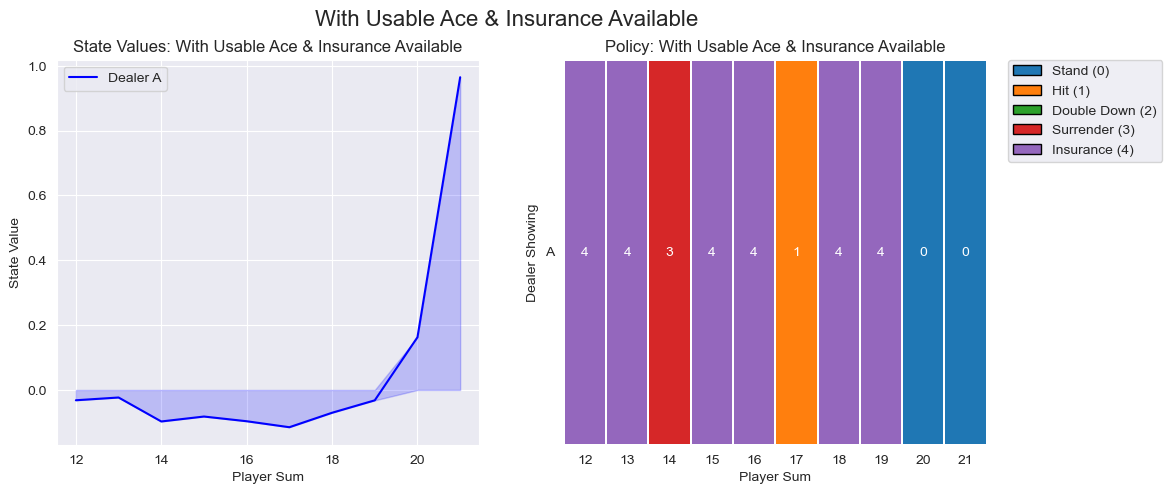

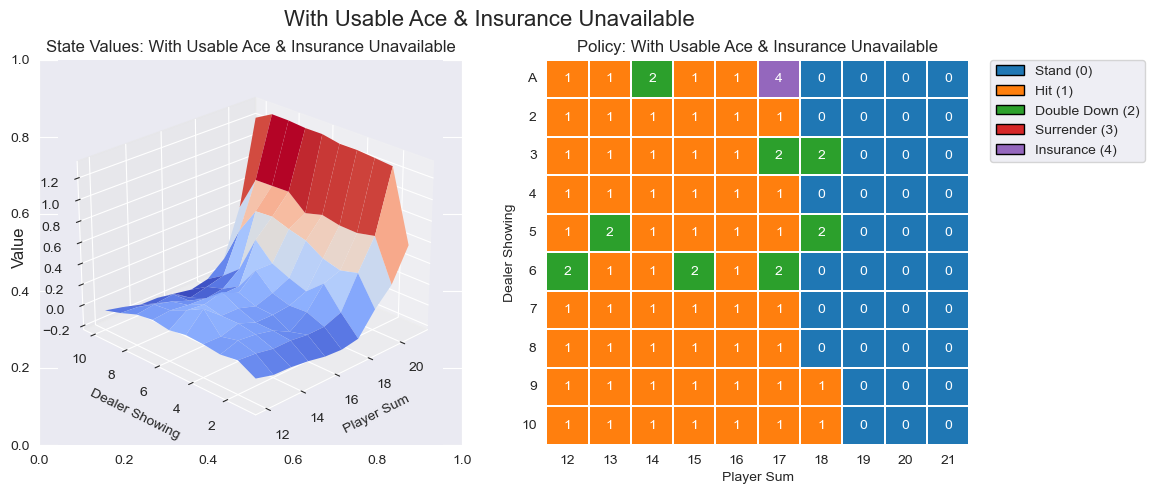

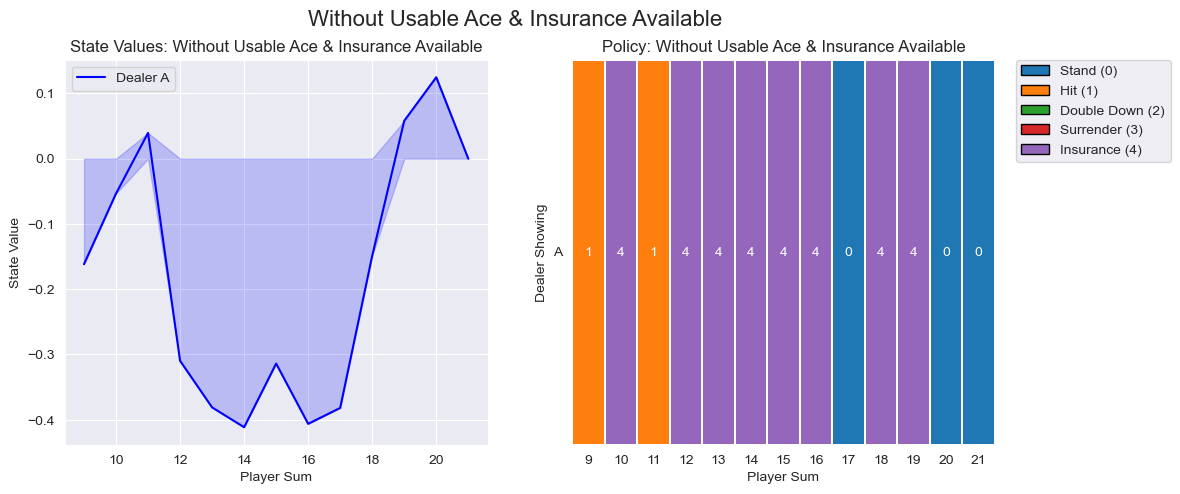

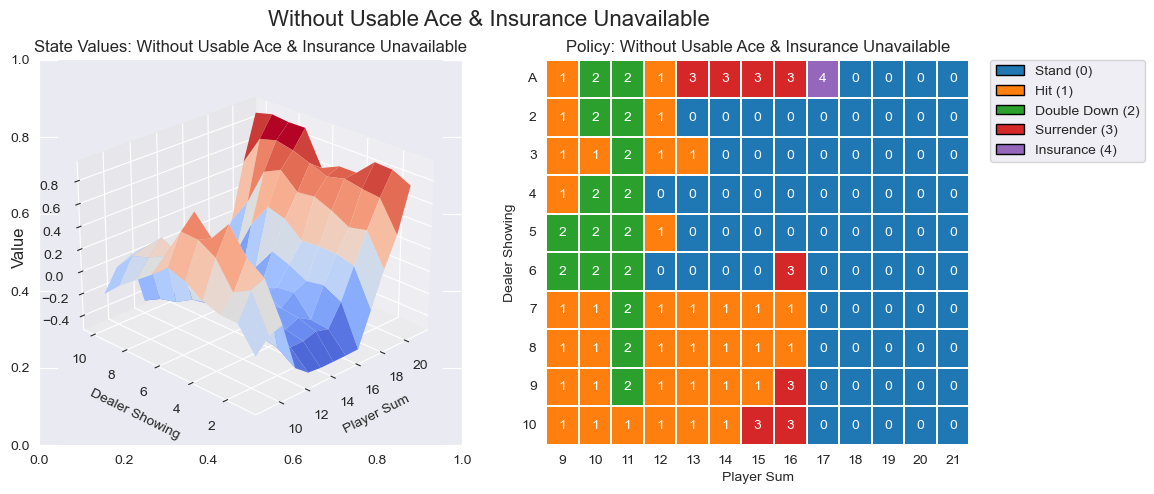

In [443]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap
import matplotlib.cm as cm  # Import colormap utilities

def create_grids(agent, usable_ace=False, insurance_available=False):
    """Create value and policy grids given an agent with multiple actions."""
    state_value = defaultdict(lambda: 0.0)
    policy = defaultdict(lambda: 0)  

    usable_ace = int(usable_ace)
    insurance_available = int(insurance_available)  # Ensure boolean is converted to int for key consistency

    for obs, action_values in agent.q_values.items():
        state_key = (obs[0], obs[1], obs[2], obs[3])  # Full state tuple
        state_value[state_key] = float(np.max(action_values))  # Store max Q-value
        policy[state_key] = int(np.argmax(action_values))  # Select best action deterministically

    # ✅ Adjust player sum range based on usable ace condition
    player_min = 12 if usable_ace else 9
    player_max = 21  

    player_count, dealer_count = np.meshgrid(
        np.arange(player_min, player_max + 1),  
        np.arange(1, 11),   
    )

    value = np.apply_along_axis(
        lambda obs: state_value.get((obs[0], obs[1], usable_ace, insurance_available), 0),
        axis=2,
        arr=np.dstack([player_count, dealer_count]),
    )
    
    policy_grid = np.apply_along_axis(
        lambda obs: policy.get((obs[0], obs[1], usable_ace, insurance_available), 0),
        axis=2,
        arr=np.dstack([player_count, dealer_count]),
    )

    return player_count, dealer_count, value, policy_grid, policy


def create_plots(player_count, dealer_count, value, policy_grid, title: str, player_min, player_max, insurance_available):
    """Creates a plot with a line plot for values and a policy grid."""
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    fig.suptitle(title, fontsize=16)

    # ✅ Define Colors for Each Action (Ensuring Correct Order)
    action_colors = {
        0: "#1f77b4",  # Stand (Blue)
        1: "#ff7f0e",  # Hit (Orange)
        2: "#2ca02c",  # Double Down (Green)
        3: "#d62728",  # Surrender (Red)
        4: "#9467bd"   # Insurance (Purple)
    }
    cmap = ListedColormap([action_colors[i] for i in range(5)])  # Ensure proper mapping
    action_labels = ["Stand (0)", "Hit (1)", "Double Down (2)", "Surrender (3)", "Insurance (4)"]
    
    if insurance_available:
        # ✅ Left Plot: 2D Line Graph with Area Shading
        ax1 = axes[0]
        dealer_idx = 0  # Only plot values where dealer is showing Ace
        ax1.plot(
            np.arange(player_min, player_max + 1),
            value[dealer_idx, :],
            label="Dealer A",
            color="blue"
        )
        ax1.fill_between(np.arange(player_min, player_max + 1), np.min(value, axis=0), np.max(value, axis=0), alpha=0.2, color="blue")
        ax1.set_title(f"State Values: {title}")
        ax1.set_xlabel("Player Sum")
        ax1.set_ylabel("State Value")
        ax1.legend(["Dealer A"])

        # ✅ Right Plot: Policy Grid (Single Row for Insurance Available)
        ax2 = axes[1]
        policy_data = policy_grid[0, :].reshape(1, -1)  # Only row where dealer shows Ace
        sns.heatmap(policy_data, linewidth=0.3, annot=True, fmt="d",
                    cmap=cmap, cbar=False, ax=ax2,
                    xticklabels=np.arange(player_min, player_max + 1), yticklabels=["A"])
    else:
        # ✅ Left Plot: 3D Surface Plot
        ax1 = axes[0]
        ax1 = fig.add_subplot(1, 2, 1, projection="3d")
        ax1.plot_surface(
            player_count,
            dealer_count,
            value,
            rstride=1,
            cstride=1,
            cmap="coolwarm",
            edgecolor="none",
        )
        ax1.set_title(f"State Values: {title}")
        ax1.set_xlabel("Player Sum")
        ax1.set_ylabel("Dealer Showing")
        ax1.zaxis.set_rotate_label(False)
        ax1.set_zlabel("Value", fontsize=12, rotation=90)
        ax1.view_init(25, 225)

        # ✅ Right Plot: Full Policy Grid
        ax2 = axes[1]
        sns.heatmap(
            policy_grid, linewidth=0.3, annot=True, fmt="d",
            cmap=cmap, cbar=False, annot_kws={"size": 10}, ax=ax2,
            vmin=0, vmax=4,  # ✅ Ensure colors correctly map to actions
            xticklabels=np.arange(player_min, player_max + 1),
            yticklabels=["A"] + list(range(2, 11))
        )
        
    ax2.set_title(f"Policy: {title}")
    ax2.set_xlabel("Player Sum")
    ax2.set_ylabel("Dealer Showing")

    # ✅ Remove overlapping labels
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0, ha="center", fontsize=10)
    ax2.set_yticklabels(ax2.get_yticklabels(), rotation=0, ha="right", fontsize=10)
    
    # ✅ Fix Legend Placement (Prevents Overlapping)
    legend_patches = [Patch(facecolor=action_colors[i], edgecolor="black", label=action_labels[i]) for i in range(5)]
    ax2.legend(handles=legend_patches, loc="upper left", bbox_to_anchor=(1.05, 1), borderaxespad=0.)

    return fig

# ✅ Generate 4 plots based on conditions
player_count, dealer_count, value_grid, policy_grid, _ = create_grids(agent, usable_ace=True, insurance_available=1)
fig1 = create_plots(player_count, dealer_count, value_grid, policy_grid, title="With Usable Ace & Insurance Available", player_min=12, player_max=21, insurance_available=1)

player_count, dealer_count, value_grid, policy_grid, _ = create_grids(agent, usable_ace=True, insurance_available=0)
fig2 = create_plots(player_count, dealer_count, value_grid, policy_grid, title="With Usable Ace & Insurance Unavailable", player_min=12, player_max=21, insurance_available=0)

player_count, dealer_count, value_grid, policy_grid, _ = create_grids(agent, usable_ace=False, insurance_available=1)
fig3 = create_plots(player_count, dealer_count, value_grid, policy_grid, title="Without Usable Ace & Insurance Available", player_min=9, player_max=21, insurance_available=1)

player_count, dealer_count, value_grid, policy_grid, _ = create_grids(agent, usable_ace=False, insurance_available=0)
fig4 = create_plots(player_count, dealer_count, value_grid, policy_grid, title="Without Usable Ace & Insurance Unavailable", player_min=9, player_max=21, insurance_available=0)

plt.show()

In [449]:
import numpy as np

test_wins = 0
test_games = 10000  # ✅ Increase for better evaluation

for _ in range(test_games):
    obs, _ = env.reset()
    step_count = 0  # ✅ Track number of steps

    while step_count < 100:  # ✅ Safety limit to prevent infinite loops
        if obs in agent.q_values:
            action = np.argmax(agent.q_values[obs])  # ✅ Use best action
        else:
            action = env.action_space.sample()  # ✅ Random action if state unseen

        obs, reward, terminated, truncated, _ = env.step(action)
        step_count += 1  # ✅ Increment step counter
        
        if terminated or truncated:  # ✅ Stop if the episode ends
            break

    if reward > 0:  # ✅ Winning condition
        test_wins += 1

win_rate = test_wins / test_games
print(f"Win Rate after {test_games:,} simulated games: {win_rate:.3%}")

Win Rate after 10,000 simulated games: 41.060%


## Fourth Train

In [481]:
# Initialize environment FIRST
env = gym.make(env_id, natural=True)

# Training loop
n_episodes = 1_000_000  # ✅ Increased slightly to ensure full convergence
learning_rate = 0.003  # ✅ Lower LR to reduce fluctuations and stabilize updates
initial_epsilon = 1.0  # ✅ Full exploration at start
epsilon_decay = 1.0 / (n_episodes / 7)  # ✅ Slightly slower decay for extended exploration
final_epsilon = 0.02  # ✅ Encourages more exploitation in later training

agent = BlackjackAgent(
    env=env,
    learning_rate=learning_rate,
    initial_epsilon=initial_epsilon, 
    epsilon_decay=epsilon_decay,
    final_epsilon=final_epsilon,
)

env = gym.wrappers.RecordEpisodeStatistics(env, buffer_length=n_episodes)
for episode in tqdm(range(n_episodes)):
    obs, info = env.reset()
    done = False

    while not done:
        action = agent.get_action(env, obs, info)
        next_obs, reward, terminated, truncated, info = env.step(action)

        agent.update(obs, action, reward, terminated, next_obs)

        done = terminated or truncated
        obs = next_obs

    agent.decay_epsilon()

100%|██████████| 1000000/1000000 [01:28<00:00, 11255.70it/s]


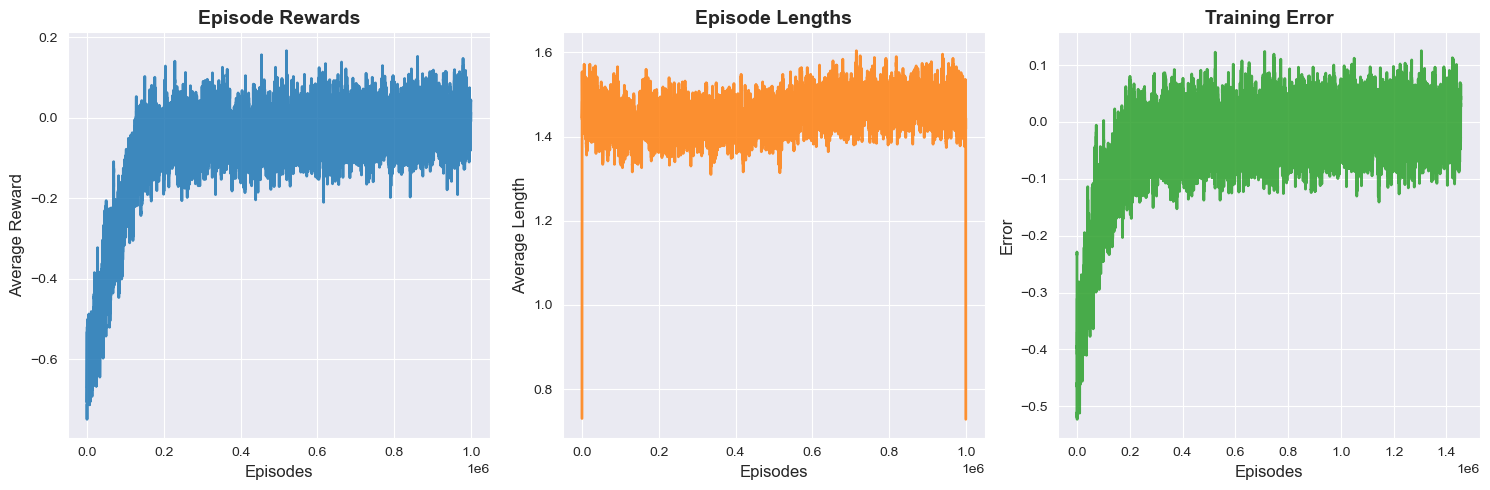

In [482]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Use a modern Seaborn style for better visuals
sns.set_style("darkgrid")

rolling_length = 500
fig, axs = plt.subplots(ncols=3, figsize=(15, 5))

# Use a modern color palette
colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]  # Blue, Orange, Green

# Episode Rewards
axs[0].set_title("Episode Rewards", fontsize=14, fontweight="bold")
reward_moving_average = np.convolve(
    np.array(env.return_queue).flatten(), np.ones(rolling_length), mode="valid"
) / rolling_length
axs[0].plot(range(len(reward_moving_average)), reward_moving_average, color=colors[0], lw=2, alpha=0.85)
axs[0].set_xlabel("Episodes", fontsize=12)
axs[0].set_ylabel("Average Reward", fontsize=12)

# Episode Lengths
axs[1].set_title("Episode Lengths", fontsize=14, fontweight="bold")
length_moving_average = np.convolve(
    np.array(env.length_queue).flatten(), np.ones(rolling_length), mode="same"
) / rolling_length
axs[1].plot(range(len(length_moving_average)), length_moving_average, color=colors[1], lw=2, alpha=0.85)
axs[1].set_xlabel("Episodes", fontsize=12)
axs[1].set_ylabel("Average Length", fontsize=12)

# Training Error
axs[2].set_title("Training Error", fontsize=14, fontweight="bold")

# Fix: Avoid empty array issues
training_error_array = np.array(agent.training_error)
if len(training_error_array) >= rolling_length:
    training_error_moving_average = np.convolve(training_error_array, np.ones(rolling_length), mode="same") / rolling_length
    axs[2].plot(range(len(training_error_moving_average)), training_error_moving_average, color=colors[2], lw=2, alpha=0.85)
else:
    axs[2].plot(range(len(training_error_array)), training_error_array, color=colors[2], lw=2, alpha=0.85)

axs[2].set_xlabel("Episodes", fontsize=12)
axs[2].set_ylabel("Error", fontsize=12)

# Better layout and spacing
plt.tight_layout()
plt.show()

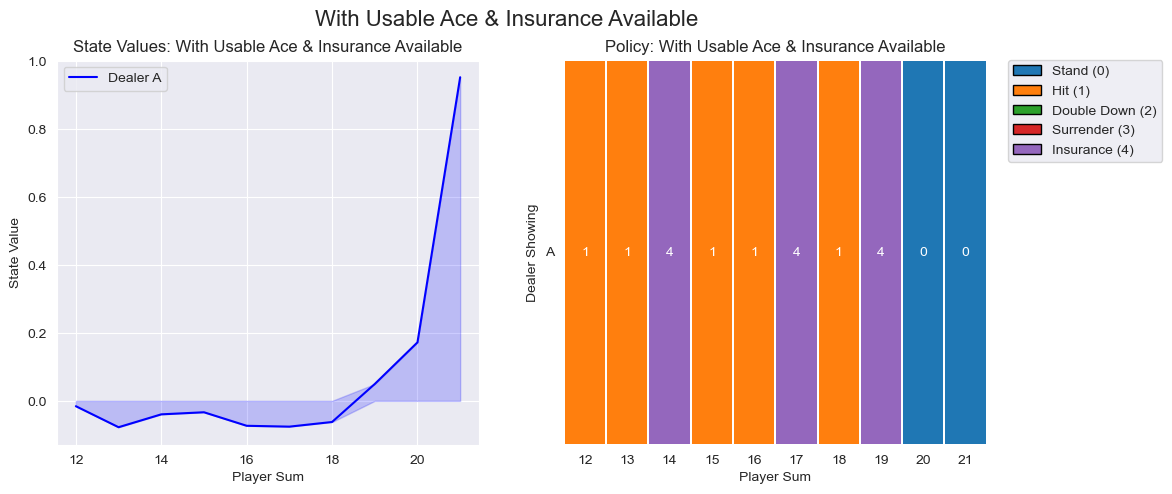

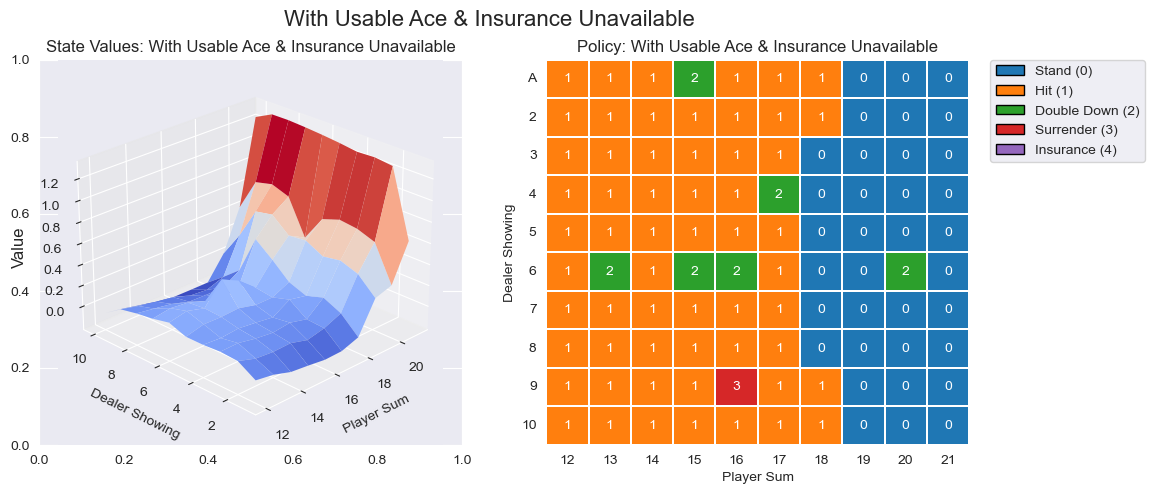

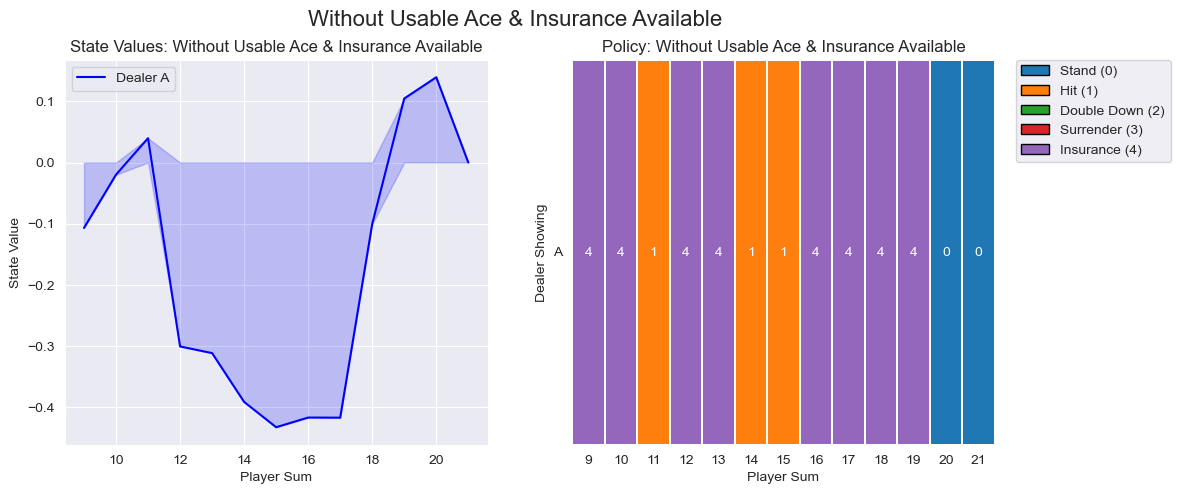

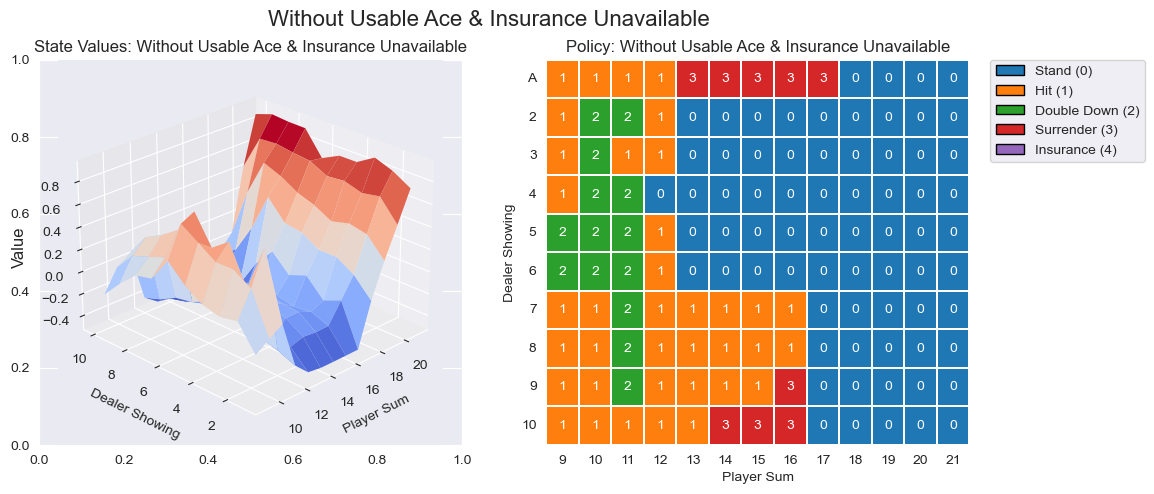

In [483]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap
import matplotlib.cm as cm  # Import colormap utilities

def create_grids(agent, usable_ace=False, insurance_available=False):
    """Create value and policy grids given an agent with multiple actions."""
    state_value = defaultdict(lambda: 0.0)
    policy = defaultdict(lambda: 0)  

    usable_ace = int(usable_ace)
    insurance_available = int(insurance_available)  # Ensure boolean is converted to int for key consistency

    for obs, action_values in agent.q_values.items():
        state_key = (obs[0], obs[1], obs[2], obs[3])  # Full state tuple
        state_value[state_key] = float(np.max(action_values))  # Store max Q-value
        policy[state_key] = int(np.argmax(action_values))  # Select best action deterministically

    # ✅ Adjust player sum range based on usable ace condition
    player_min = 12 if usable_ace else 9
    player_max = 21  

    player_count, dealer_count = np.meshgrid(
        np.arange(player_min, player_max + 1),  
        np.arange(1, 11),   
    )

    value = np.apply_along_axis(
        lambda obs: state_value.get((obs[0], obs[1], usable_ace, insurance_available), 0),
        axis=2,
        arr=np.dstack([player_count, dealer_count]),
    )
    
    policy_grid = np.apply_along_axis(
        lambda obs: policy.get((obs[0], obs[1], usable_ace, insurance_available), 0),
        axis=2,
        arr=np.dstack([player_count, dealer_count]),
    )

    return player_count, dealer_count, value, policy_grid, policy


def create_plots(player_count, dealer_count, value, policy_grid, title: str, player_min, player_max, insurance_available):
    """Creates a plot with a line plot for values and a policy grid."""
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    fig.suptitle(title, fontsize=16)

    # ✅ Define Colors for Each Action (Ensuring Correct Order)
    action_colors = {
        0: "#1f77b4",  # Stand (Blue)
        1: "#ff7f0e",  # Hit (Orange)
        2: "#2ca02c",  # Double Down (Green)
        3: "#d62728",  # Surrender (Red)
        4: "#9467bd"   # Insurance (Purple)
    }
    cmap = ListedColormap([action_colors[i] for i in range(5)])  # Ensure proper mapping
    action_labels = ["Stand (0)", "Hit (1)", "Double Down (2)", "Surrender (3)", "Insurance (4)"]
    
    if insurance_available:
        # ✅ Left Plot: 2D Line Graph with Area Shading
        ax1 = axes[0]
        dealer_idx = 0  # Only plot values where dealer is showing Ace
        ax1.plot(
            np.arange(player_min, player_max + 1),
            value[dealer_idx, :],
            label="Dealer A",
            color="blue"
        )
        ax1.fill_between(np.arange(player_min, player_max + 1), np.min(value, axis=0), np.max(value, axis=0), alpha=0.2, color="blue")
        ax1.set_title(f"State Values: {title}")
        ax1.set_xlabel("Player Sum")
        ax1.set_ylabel("State Value")
        ax1.legend(["Dealer A"])

        # ✅ Right Plot: Policy Grid (Single Row for Insurance Available)
        ax2 = axes[1]
        policy_data = policy_grid[0, :].reshape(1, -1)  # Only row where dealer shows Ace
        sns.heatmap(policy_data, linewidth=0.3, annot=True, fmt="d",
                    cmap=cmap, cbar=False, ax=ax2,
                    xticklabels=np.arange(player_min, player_max + 1), yticklabels=["A"])
    else:
        # ✅ Left Plot: 3D Surface Plot
        ax1 = axes[0]
        ax1 = fig.add_subplot(1, 2, 1, projection="3d")
        ax1.plot_surface(
            player_count,
            dealer_count,
            value,
            rstride=1,
            cstride=1,
            cmap="coolwarm",
            edgecolor="none",
        )
        ax1.set_title(f"State Values: {title}")
        ax1.set_xlabel("Player Sum")
        ax1.set_ylabel("Dealer Showing")
        ax1.zaxis.set_rotate_label(False)
        ax1.set_zlabel("Value", fontsize=12, rotation=90)
        ax1.view_init(25, 225)

        # ✅ Right Plot: Full Policy Grid
        ax2 = axes[1]
        sns.heatmap(
            policy_grid, linewidth=0.3, annot=True, fmt="d",
            cmap=cmap, cbar=False, annot_kws={"size": 10}, ax=ax2,
            vmin=0, vmax=4,  # ✅ Ensure colors correctly map to actions
            xticklabels=np.arange(player_min, player_max + 1),
            yticklabels=["A"] + list(range(2, 11))
        )
        
    ax2.set_title(f"Policy: {title}")
    ax2.set_xlabel("Player Sum")
    ax2.set_ylabel("Dealer Showing")

    # ✅ Remove overlapping labels
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0, ha="center", fontsize=10)
    ax2.set_yticklabels(ax2.get_yticklabels(), rotation=0, ha="right", fontsize=10)
    
    # ✅ Fix Legend Placement (Prevents Overlapping)
    legend_patches = [Patch(facecolor=action_colors[i], edgecolor="black", label=action_labels[i]) for i in range(5)]
    ax2.legend(handles=legend_patches, loc="upper left", bbox_to_anchor=(1.05, 1), borderaxespad=0.)

    return fig

# ✅ Generate 4 plots based on conditions
player_count, dealer_count, value_grid, policy_grid, _ = create_grids(agent, usable_ace=True, insurance_available=1)
fig1 = create_plots(player_count, dealer_count, value_grid, policy_grid, title="With Usable Ace & Insurance Available", player_min=12, player_max=21, insurance_available=1)

player_count, dealer_count, value_grid, policy_grid, _ = create_grids(agent, usable_ace=True, insurance_available=0)
fig2 = create_plots(player_count, dealer_count, value_grid, policy_grid, title="With Usable Ace & Insurance Unavailable", player_min=12, player_max=21, insurance_available=0)

player_count, dealer_count, value_grid, policy_grid, _ = create_grids(agent, usable_ace=False, insurance_available=1)
fig3 = create_plots(player_count, dealer_count, value_grid, policy_grid, title="Without Usable Ace & Insurance Available", player_min=9, player_max=21, insurance_available=1)

player_count, dealer_count, value_grid, policy_grid, _ = create_grids(agent, usable_ace=False, insurance_available=0)
fig4 = create_plots(player_count, dealer_count, value_grid, policy_grid, title="Without Usable Ace & Insurance Unavailable", player_min=9, player_max=21, insurance_available=0)

plt.show()

In [491]:
import numpy as np

test_wins = 0
test_games = 10000  # ✅ Increase for better evaluation

for _ in range(test_games):
    obs, _ = env.reset()
    step_count = 0  # ✅ Track number of steps

    while step_count < 100:  # ✅ Safety limit to prevent infinite loops
        if obs in agent.q_values:
            action = np.argmax(agent.q_values[obs])  # ✅ Use best action
        else:
            action = env.action_space.sample()  # ✅ Random action if state unseen

        obs, reward, terminated, truncated, _ = env.step(action)
        step_count += 1  # ✅ Increment step counter
        
        if terminated or truncated:  # ✅ Stop if the episode ends
            break

    if reward > 0:  # ✅ Winning condition
        test_wins += 1

win_rate = test_wins / test_games
print(f"Win Rate after {test_games:,} simulated games: {win_rate:.3%}")

Win Rate after 10,000 simulated games: 40.740%


In [493]:
import numpy as np

test_wins = 0
test_games = 10000  # ✅ Increase for better evaluation

for _ in range(test_games):
    obs, _ = env.reset()
    step_count = 0  # ✅ Track number of steps

    while step_count < 100:  # ✅ Safety limit to prevent infinite loops
        if obs in agent.q_values:
            action = np.argmax(agent.q_values[obs])  # ✅ Use best action
        else:
            action = env.action_space.sample()  # ✅ Random action if state unseen

        obs, reward, terminated, truncated, _ = env.step(action)
        step_count += 1  # ✅ Increment step counter
        
        if terminated or truncated:  # ✅ Stop if the episode ends
            break

    if reward > 0:  # ✅ Winning condition
        test_wins += 1

win_rate = test_wins / test_games
print(f"Win Rate after {test_games:,} simulated games: {win_rate:.3%}")

Win Rate after 10,000 simulated games: 41.040%


## Hyperparameter Tuning

In [512]:
import gymnasium as gym
from collections import defaultdict
import numpy as np
from tqdm import tqdm

class BlackjackAgent:
    def __init__(
        self,
        env,
        learning_rate: float,
        initial_epsilon: float,
        epsilon_decay: float,
        final_epsilon: float,
        discount_factor: float = 0.95,
    ):
        """Initialize a Reinforcement Learning agent with an empty dictionary
        of state-action values (q_values), a learning rate, and an epsilon."""
        self.q_values = defaultdict(lambda: np.zeros(env.action_space.n))

        self.lr = learning_rate
        self.discount_factor = discount_factor

        self.epsilon = initial_epsilon
        self.epsilon_decay = epsilon_decay
        self.final_epsilon = final_epsilon

        self.training_error = []
    
    def get_action(self, env, obs, info):
        """Selects an action using an epsilon-greedy policy."""
        player_sum, dealer_upcard, usable_ace, insurance_available = obs 
        num_cards = info.get("num_cards") 
    
        if np.random.random() < self.epsilon:  # Explore
            action = env.action_space.sample()
    
            if action == 2 and num_cards > 2:  # ❌ Prevent Double Down after first move
                action = np.random.choice([0, 1])  

            if action == 3 and num_cards > 2:  # ❌ Prevent Surrender after first move
                action = np.random.choice([0, 1])  
            
            return action
        else:  # Exploit best known action
            q_values = self.q_values[obs].copy()
    
            if num_cards > 2:
                q_values[2] = -float("inf")  # Prevents Double Down
                q_values[3] = -float("inf")  # Prevents Surrender
                q_values[4] = -float("inf")  # Prevents Insurance
                
            return int(np.argmax(q_values))

    def update(self, obs, action, reward, terminated, next_obs):
        """Updates the Q-value of an action using the Q-learning formula."""
        future_q_value = 0 if terminated else np.max(self.q_values[next_obs])
    
        temporal_difference = (
            reward + self.discount_factor * future_q_value - self.q_values[obs][action]
        )
    
        self.q_values[obs][action] += self.lr * temporal_difference
        self.training_error.append(temporal_difference)

    def decay_epsilon(self):
        """Decays epsilon over time to reduce exploration."""
        self.epsilon = max(self.final_epsilon, self.epsilon - self.epsilon_decay)

def train_and_evaluate(env_id, n_episodes, learning_rate, epsilon_decay, final_epsilon):
    """Trains the agent and returns the win rate."""
    env = gym.make(env_id, natural=True)
    agent = BlackjackAgent(env, learning_rate, 1.0, epsilon_decay, final_epsilon)
    env = gym.wrappers.RecordEpisodeStatistics(env, buffer_length=int(n_episodes))

    # ✅ Training Phase
    for _ in tqdm(range(n_episodes), desc="Training"):
        obs, info = env.reset()
        done = False

        while not done:
            action = agent.get_action(env, obs, info)
            next_obs, reward, terminated, truncated, info = env.step(action)
            agent.update(obs, action, reward, terminated, next_obs)

            done = terminated or truncated
            obs = next_obs

        agent.decay_epsilon()

    # ✅ Evaluation Phase (Pure Exploitation)
    agent.epsilon = 0  # ✅ Ensure greedy action selection for best policy
    test_wins = 0
    test_games = 10000

    for _ in range(test_games):
        obs, _ = env.reset()
        step_count = 0  

        while step_count < 100:
            if obs in agent.q_values:
                action = np.argmax(agent.q_values[obs])  
            else:
                action = env.action_space.sample()  

            obs, reward, terminated, truncated, _ = env.step(action)
            step_count += 1

            if terminated or truncated:
                break  

        if reward > 0:
            test_wins += 1

    win_rate = test_wins / test_games
    print(f"\n✅ Win Rate after {test_games:,} simulated games: {win_rate:.3%}")
    
    return win_rate

# ✅ Environment Setup
env = gym.make(env_id, natural=True)

# ✅ Optimized Hyperparameters
n_episodes = 750000  # ✅ Reduce if plateau occurs early
learning_rate = 0.005  # ✅ Slightly lower LR to stabilize learning
initial_epsilon = 1.0
epsilon_decay = 1.0 / (n_episodes / 2.5)  # ✅ Slower decay for better early exploration
final_epsilon = 0.05  # ✅ More exploitation in the later phase

# ✅ Hyperparameter Tuning
n_step = 250000
lr_step = 0.0005  
decay_step = 1.0 / (n_episodes / 0.5)  
final_eps_step = 0.005  

print("\n🔹 Evaluating Original Hyperparameters...")
best_win_rate = train_and_evaluate(env_id, n_episodes, learning_rate, epsilon_decay, final_epsilon)
print(f"✅ Original Win Rate: {best_win_rate:.3%}")

for i in range(10):  
    print(f"\n🔹 Tuning Iteration {i+1}")

    # Adjust parameters slightly
    new_n = int(n_episodes + np.random.choice([-n_step, 0, n_step]))  # ✅ Cast to int
    new_lr = learning_rate + np.random.choice([-lr_step, 0, lr_step])
    new_decay = epsilon_decay + np.random.choice([-decay_step, 0, decay_step])
    new_final_eps = final_epsilon + np.random.choice([-final_eps_step, 0, final_eps_step])

    # ✅ Train and evaluate
    win_rate = train_and_evaluate(env_id, new_n, new_lr, new_decay, new_final_eps)
    print(f"✅ New Win Rate: {win_rate:.3%} | n_eps: {new_n} | LR: {new_lr} | Decay: {new_decay} | Final Epsilon: {new_final_eps}")

    # ✅ If the new configuration is better, keep it
    if win_rate > best_win_rate:
        best_win_rate = win_rate
        learning_rate, epsilon_decay, final_epsilon = new_lr, new_decay, new_final_eps
        print(f"🔥 Improved! Updating best parameters.")
    else:
        print("❌ No improvement, reverting.")

print("\n✅ Best Tuned Hyperparameters:")
print(f"Learning Rate: {learning_rate}")
print(f"Epsilon Decay: {epsilon_decay}")
print(f"Final Epsilon: {final_epsilon}")
print(f"Best Win Rate: {best_win_rate:.3%}")


🔹 Evaluating Original Hyperparameters...


Training: 100%|██████████| 750000/750000 [01:05<00:00, 11395.94it/s]



✅ Win Rate after 10,000 simulated games: 41.000%
✅ Original Win Rate: 41.000%

🔹 Tuning Iteration 1


Training: 100%|██████████| 750000/750000 [01:05<00:00, 11395.90it/s]



✅ Win Rate after 10,000 simulated games: 40.090%
✅ New Win Rate: 40.090% | n_eps: 750000 | LR: 0.0045000000000000005 | Decay: 3.3333333333333333e-06 | Final Epsilon: 0.05
❌ No improvement, reverting.

🔹 Tuning Iteration 2


Training: 100%|██████████| 1000000/1000000 [01:28<00:00, 11354.14it/s]



✅ Win Rate after 10,000 simulated games: 39.760%
✅ New Win Rate: 39.760% | n_eps: 1000000 | LR: 0.0055 | Decay: 4e-06 | Final Epsilon: 0.045000000000000005
❌ No improvement, reverting.

🔹 Tuning Iteration 3


Training: 100%|██████████| 500000/500000 [00:43<00:00, 11398.89it/s]



✅ Win Rate after 10,000 simulated games: 39.780%
✅ New Win Rate: 39.780% | n_eps: 500000 | LR: 0.0055 | Decay: 3.3333333333333333e-06 | Final Epsilon: 0.045000000000000005
❌ No improvement, reverting.

🔹 Tuning Iteration 4


Training: 100%|██████████| 1000000/1000000 [01:27<00:00, 11383.39it/s]



✅ Win Rate after 10,000 simulated games: 39.670%
✅ New Win Rate: 39.670% | n_eps: 1000000 | LR: 0.0055 | Decay: 4e-06 | Final Epsilon: 0.05
❌ No improvement, reverting.

🔹 Tuning Iteration 5


Training: 100%|██████████| 500000/500000 [00:43<00:00, 11388.71it/s]



✅ Win Rate after 10,000 simulated games: 39.640%
✅ New Win Rate: 39.640% | n_eps: 500000 | LR: 0.005 | Decay: 2.666666666666667e-06 | Final Epsilon: 0.045000000000000005
❌ No improvement, reverting.

🔹 Tuning Iteration 6


Training: 100%|██████████| 750000/750000 [01:05<00:00, 11413.02it/s]



✅ Win Rate after 10,000 simulated games: 41.490%
✅ New Win Rate: 41.490% | n_eps: 750000 | LR: 0.005 | Decay: 4e-06 | Final Epsilon: 0.055
🔥 Improved! Updating best parameters.

🔹 Tuning Iteration 7


Training: 100%|██████████| 750000/750000 [01:05<00:00, 11400.40it/s]



✅ Win Rate after 10,000 simulated games: 38.280%
✅ New Win Rate: 38.280% | n_eps: 750000 | LR: 0.005 | Decay: 4e-06 | Final Epsilon: 0.055
❌ No improvement, reverting.

🔹 Tuning Iteration 8


Training: 100%|██████████| 1000000/1000000 [01:27<00:00, 11368.27it/s]



✅ Win Rate after 10,000 simulated games: 40.360%
✅ New Win Rate: 40.360% | n_eps: 1000000 | LR: 0.0045000000000000005 | Decay: 4e-06 | Final Epsilon: 0.06
❌ No improvement, reverting.

🔹 Tuning Iteration 9


Training: 100%|██████████| 1000000/1000000 [01:27<00:00, 11408.22it/s]



✅ Win Rate after 10,000 simulated games: 40.580%
✅ New Win Rate: 40.580% | n_eps: 1000000 | LR: 0.0045000000000000005 | Decay: 3.3333333333333333e-06 | Final Epsilon: 0.06
❌ No improvement, reverting.

🔹 Tuning Iteration 10


Training: 100%|██████████| 1000000/1000000 [01:27<00:00, 11368.70it/s]



✅ Win Rate after 10,000 simulated games: 41.570%
✅ New Win Rate: 41.570% | n_eps: 1000000 | LR: 0.005 | Decay: 4.666666666666666e-06 | Final Epsilon: 0.055
🔥 Improved! Updating best parameters.

✅ Best Tuned Hyperparameters:
Num of Episodes: 750000
Learning Rate: 0.005
Epsilon Decay: 4.666666666666666e-06
Final Epsilon: 0.055
Best Win Rate: 41.570%


## Alternative Best Model

In [7]:
import gymnasium as gym
from collections import defaultdict
import numpy as np
from tqdm import tqdm

class BlackjackAgent:
    def __init__(
        self,
        env,
        learning_rate: float,
        initial_epsilon: float,
        epsilon_decay: float,
        final_epsilon: float,
        discount_factor: float = 0.95,
    ):
        """Initialize a Reinforcement Learning agent with an empty dictionary
        of state-action values (q_values), a learning rate, and an epsilon."""
        self.q_values = defaultdict(lambda: np.zeros(env.action_space.n))

        self.lr = learning_rate
        self.discount_factor = discount_factor

        self.epsilon = initial_epsilon
        self.epsilon_decay = epsilon_decay
        self.final_epsilon = final_epsilon

        self.training_error = []
    
    def get_action(self, env, obs, info):
        """Selects an action using an epsilon-greedy policy."""
        player_sum, dealer_upcard, usable_ace, insurance_available = obs 
        num_cards = info.get("num_cards") 
    
        if np.random.random() < self.epsilon:  # Explore
            action = env.action_space.sample()
    
            if action == 2 and num_cards > 2:  # ❌ Prevent Double Down after first move
                action = np.random.choice([0, 1])  

            if action == 3 and num_cards > 2:  # ❌ Prevent Surrender after first move
                action = np.random.choice([0, 1])  
            
            return action
        else:  # Exploit best known action
            q_values = self.q_values[obs].copy()
    
            if num_cards > 2:
                q_values[2] = -float("inf")  # Prevents Double Down
                q_values[3] = -float("inf")  # Prevents Surrender
                q_values[4] = -float("inf")  # Prevents Insurance
                
            return int(np.argmax(q_values))

    def update(self, obs, action, reward, terminated, next_obs):
        """Updates the Q-value of an action using the Q-learning formula."""
        future_q_value = 0 if terminated else np.max(self.q_values[next_obs])
    
        temporal_difference = (
            reward + self.discount_factor * future_q_value - self.q_values[obs][action]
        )
    
        self.q_values[obs][action] += self.lr * temporal_difference
        self.training_error.append(temporal_difference)

    def decay_epsilon(self):
        """Decays epsilon over time to reduce exploration."""
        self.epsilon = max(self.final_epsilon, self.epsilon - self.epsilon_decay)

In [9]:
# Initialize environment FIRST
env = gym.make(env_id, natural=True)

# Training loop
n_episodes = 750000  # ✅ Increase episodes for better convergence
learning_rate = 0.005  # ✅ Even lower to prevent oscillations
initial_epsilon = 1.0
epsilon_decay = 1.0 / (n_episodes / 4.5)  # ✅ Even slower decay for sustained exploration
final_epsilon = 0.055  # ✅ Ensures sufficient exploitation in the later phase

agent = BlackjackAgent(
    env=env,
    learning_rate=learning_rate,
    initial_epsilon=initial_epsilon, 
    epsilon_decay=epsilon_decay,
    final_epsilon=final_epsilon,
)

env = gym.wrappers.RecordEpisodeStatistics(env, buffer_length=n_episodes)
for episode in tqdm(range(n_episodes)):
    obs, info = env.reset()
    done = False

    while not done:
        action = agent.get_action(env, obs, info)
        next_obs, reward, terminated, truncated, info = env.step(action)

        agent.update(obs, action, reward, terminated, next_obs)

        done = terminated or truncated
        obs = next_obs

    agent.decay_epsilon()

100%|██████████| 750000/750000 [01:16<00:00, 9822.16it/s] 


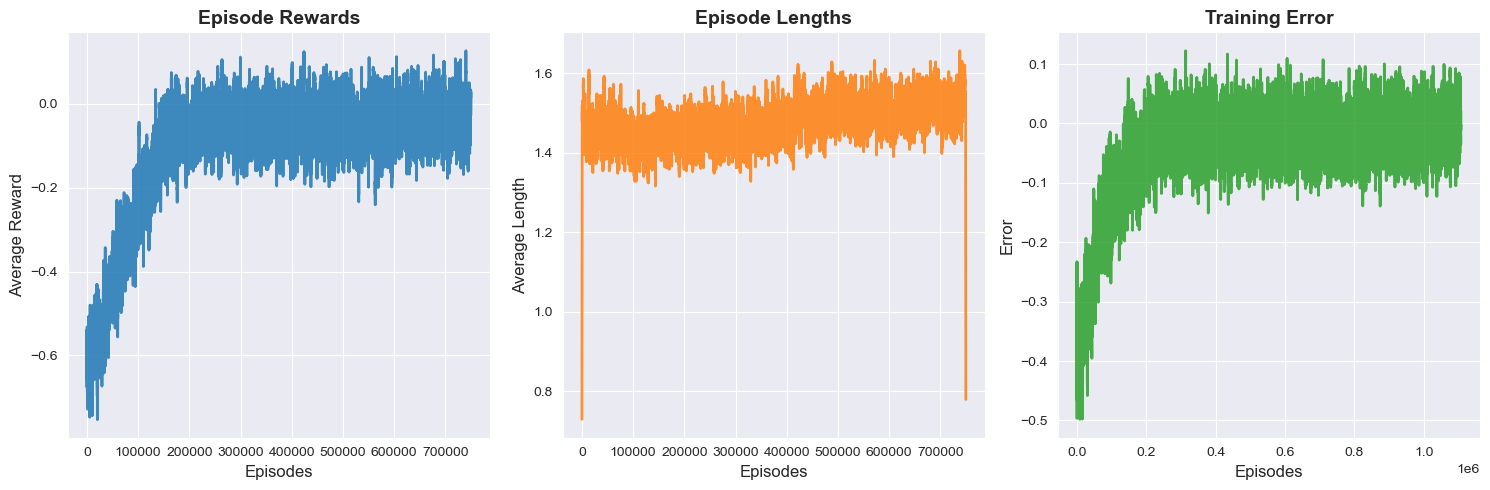

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Use a modern Seaborn style for better visuals
sns.set_style("darkgrid")

rolling_length = 500
fig, axs = plt.subplots(ncols=3, figsize=(15, 5))

# Use a modern color palette
colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]  # Blue, Orange, Green

# Episode Rewards
axs[0].set_title("Episode Rewards", fontsize=14, fontweight="bold")
reward_moving_average = np.convolve(
    np.array(env.return_queue).flatten(), np.ones(rolling_length), mode="valid"
) / rolling_length
axs[0].plot(range(len(reward_moving_average)), reward_moving_average, color=colors[0], lw=2, alpha=0.85)
axs[0].set_xlabel("Episodes", fontsize=12)
axs[0].set_ylabel("Average Reward", fontsize=12)

# Episode Lengths
axs[1].set_title("Episode Lengths", fontsize=14, fontweight="bold")
length_moving_average = np.convolve(
    np.array(env.length_queue).flatten(), np.ones(rolling_length), mode="same"
) / rolling_length
axs[1].plot(range(len(length_moving_average)), length_moving_average, color=colors[1], lw=2, alpha=0.85)
axs[1].set_xlabel("Episodes", fontsize=12)
axs[1].set_ylabel("Average Length", fontsize=12)

# Training Error
axs[2].set_title("Training Error", fontsize=14, fontweight="bold")

# Fix: Avoid empty array issues
training_error_array = np.array(agent.training_error)
if len(training_error_array) >= rolling_length:
    training_error_moving_average = np.convolve(training_error_array, np.ones(rolling_length), mode="same") / rolling_length
    axs[2].plot(range(len(training_error_moving_average)), training_error_moving_average, color=colors[2], lw=2, alpha=0.85)
else:
    axs[2].plot(range(len(training_error_array)), training_error_array, color=colors[2], lw=2, alpha=0.85)

axs[2].set_xlabel("Episodes", fontsize=12)
axs[2].set_ylabel("Error", fontsize=12)

# Better layout and spacing
plt.tight_layout()
plt.show()

### Hide

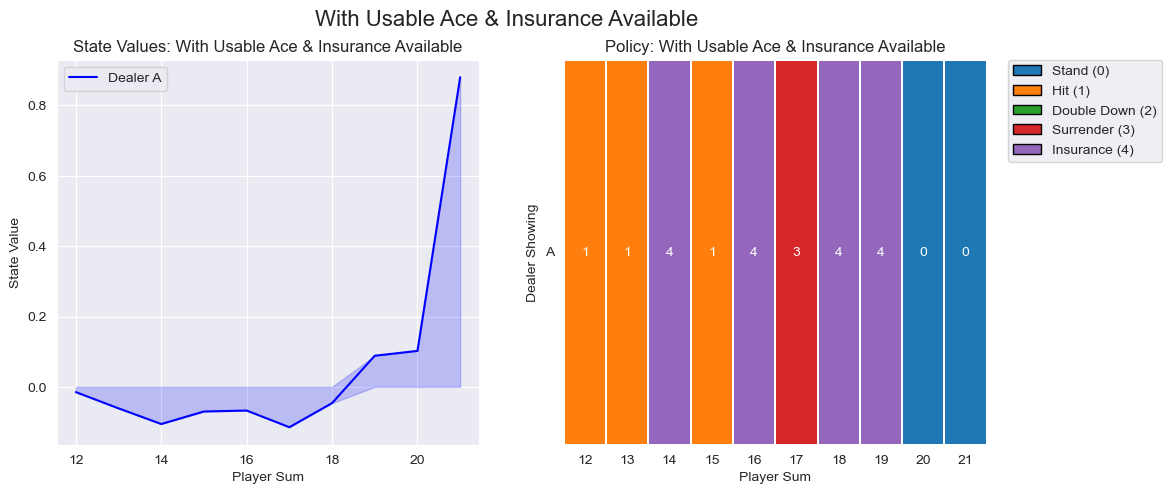

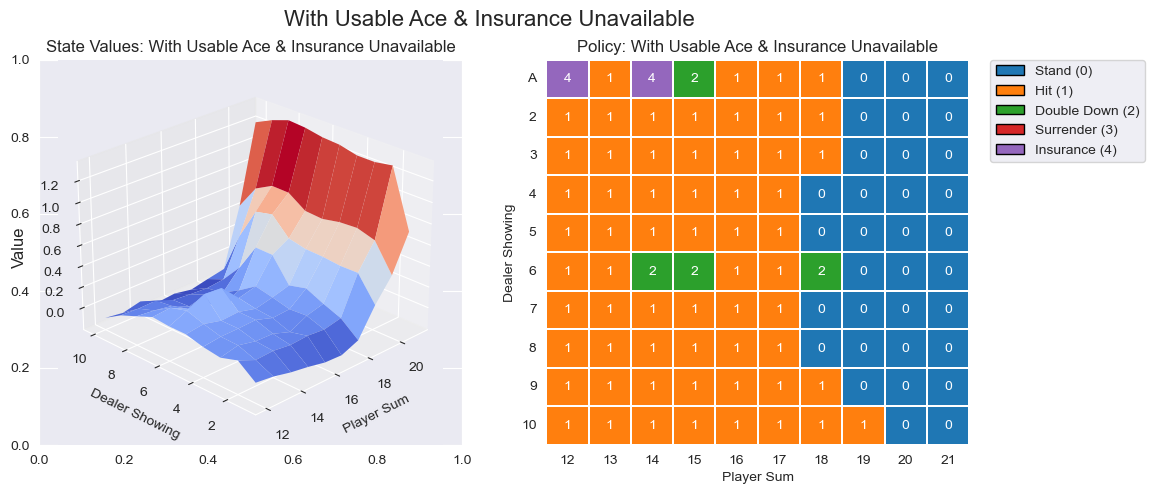

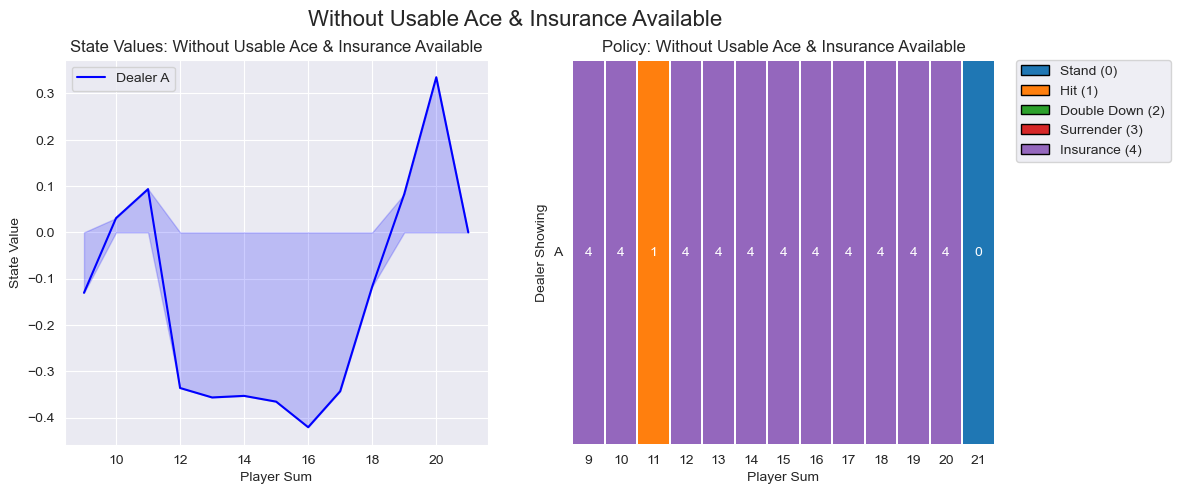

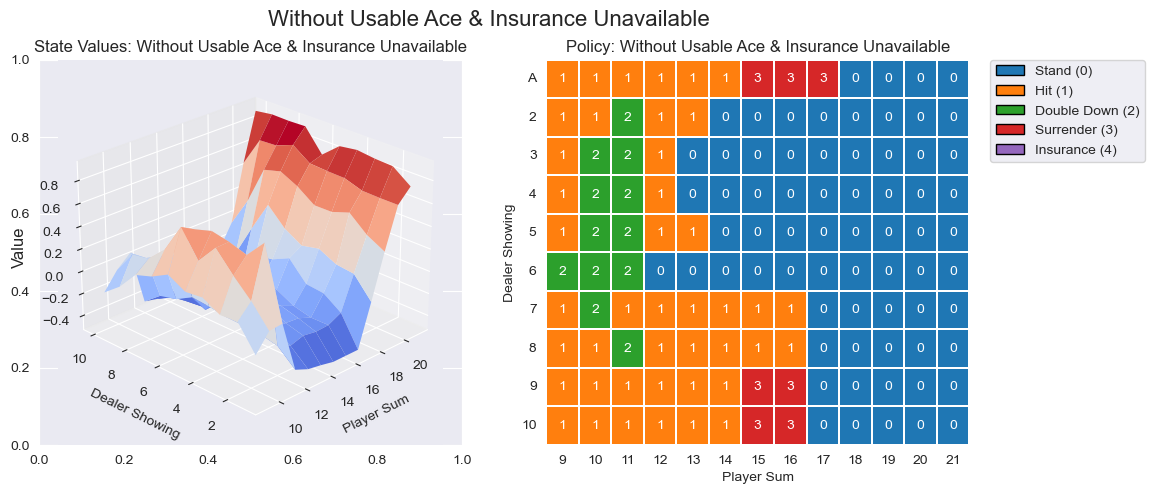

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap
import matplotlib.cm as cm  # Import colormap utilities

def create_grids(agent, usable_ace=False, insurance_available=False):
    """Create value and policy grids given an agent with multiple actions."""
    state_value = defaultdict(lambda: 0.0)
    policy = defaultdict(lambda: 0)  

    usable_ace = int(usable_ace)
    insurance_available = int(insurance_available)  # Ensure boolean is converted to int for key consistency

    for obs, action_values in agent.q_values.items():
        state_key = (obs[0], obs[1], obs[2], obs[3])  # Full state tuple
        state_value[state_key] = float(np.max(action_values))  # Store max Q-value
        policy[state_key] = int(np.argmax(action_values))  # Select best action deterministically

    # ✅ Adjust player sum range based on usable ace condition
    player_min = 12 if usable_ace else 9
    player_max = 21  

    player_count, dealer_count = np.meshgrid(
        np.arange(player_min, player_max + 1),  
        np.arange(1, 11),   
    )

    value = np.apply_along_axis(
        lambda obs: state_value.get((obs[0], obs[1], usable_ace, insurance_available), 0),
        axis=2,
        arr=np.dstack([player_count, dealer_count]),
    )
    
    policy_grid = np.apply_along_axis(
        lambda obs: policy.get((obs[0], obs[1], usable_ace, insurance_available), 0),
        axis=2,
        arr=np.dstack([player_count, dealer_count]),
    )

    return player_count, dealer_count, value, policy_grid, policy


def create_plots(player_count, dealer_count, value, policy_grid, title: str, player_min, player_max, insurance_available):
    """Creates a plot with a line plot for values and a policy grid."""
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    fig.suptitle(title, fontsize=16)

    # ✅ Define Colors for Each Action (Ensuring Correct Order)
    action_colors = {
        0: "#1f77b4",  # Stand (Blue)
        1: "#ff7f0e",  # Hit (Orange)
        2: "#2ca02c",  # Double Down (Green)
        3: "#d62728",  # Surrender (Red)
        4: "#9467bd"   # Insurance (Purple)
    }
    cmap = ListedColormap([action_colors[i] for i in range(5)])  # Ensure proper mapping
    action_labels = ["Stand (0)", "Hit (1)", "Double Down (2)", "Surrender (3)", "Insurance (4)"]
    
    if insurance_available:
        # ✅ Left Plot: 2D Line Graph with Area Shading
        ax1 = axes[0]
        dealer_idx = 0  # Only plot values where dealer is showing Ace
        ax1.plot(
            np.arange(player_min, player_max + 1),
            value[dealer_idx, :],
            label="Dealer A",
            color="blue"
        )
        ax1.fill_between(np.arange(player_min, player_max + 1), np.min(value, axis=0), np.max(value, axis=0), alpha=0.2, color="blue")
        ax1.set_title(f"State Values: {title}")
        ax1.set_xlabel("Player Sum")
        ax1.set_ylabel("State Value")
        ax1.legend(["Dealer A"])

        # ✅ Right Plot: Policy Grid (Single Row for Insurance Available)
        ax2 = axes[1]
        policy_data = policy_grid[0, :].reshape(1, -1)  # Only row where dealer shows Ace
        sns.heatmap(policy_data, linewidth=0.3, annot=True, fmt="d",
                    cmap=cmap, cbar=False, ax=ax2,
                    xticklabels=np.arange(player_min, player_max + 1), yticklabels=["A"])
    else:
        # ✅ Left Plot: 3D Surface Plot
        ax1 = axes[0]
        ax1 = fig.add_subplot(1, 2, 1, projection="3d")
        ax1.plot_surface(
            player_count,
            dealer_count,
            value,
            rstride=1,
            cstride=1,
            cmap="coolwarm",
            edgecolor="none",
        )
        ax1.set_title(f"State Values: {title}")
        ax1.set_xlabel("Player Sum")
        ax1.set_ylabel("Dealer Showing")
        ax1.zaxis.set_rotate_label(False)
        ax1.set_zlabel("Value", fontsize=12, rotation=90)
        ax1.view_init(25, 225)

        # ✅ Right Plot: Full Policy Grid
        ax2 = axes[1]
        sns.heatmap(
            policy_grid, linewidth=0.3, annot=True, fmt="d",
            cmap=cmap, cbar=False, annot_kws={"size": 10}, ax=ax2,
            vmin=0, vmax=4,  # ✅ Ensure colors correctly map to actions
            xticklabels=np.arange(player_min, player_max + 1),
            yticklabels=["A"] + list(range(2, 11))
        )
        
    ax2.set_title(f"Policy: {title}")
    ax2.set_xlabel("Player Sum")
    ax2.set_ylabel("Dealer Showing")

    # ✅ Remove overlapping labels
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0, ha="center", fontsize=10)
    ax2.set_yticklabels(ax2.get_yticklabels(), rotation=0, ha="right", fontsize=10)
    
    # ✅ Fix Legend Placement (Prevents Overlapping)
    legend_patches = [Patch(facecolor=action_colors[i], edgecolor="black", label=action_labels[i]) for i in range(5)]
    ax2.legend(handles=legend_patches, loc="upper left", bbox_to_anchor=(1.05, 1), borderaxespad=0.)

    return fig

# ✅ Generate 4 plots based on conditions
player_count, dealer_count, value_grid, policy_grid, _ = create_grids(agent, usable_ace=True, insurance_available=1)
fig1 = create_plots(player_count, dealer_count, value_grid, policy_grid, title="With Usable Ace & Insurance Available", player_min=12, player_max=21, insurance_available=1)

player_count, dealer_count, value_grid, policy_grid, _ = create_grids(agent, usable_ace=True, insurance_available=0)
fig2 = create_plots(player_count, dealer_count, value_grid, policy_grid, title="With Usable Ace & Insurance Unavailable", player_min=12, player_max=21, insurance_available=0)

player_count, dealer_count, value_grid, policy_grid, _ = create_grids(agent, usable_ace=False, insurance_available=1)
fig3 = create_plots(player_count, dealer_count, value_grid, policy_grid, title="Without Usable Ace & Insurance Available", player_min=9, player_max=21, insurance_available=1)

player_count, dealer_count, value_grid, policy_grid, _ = create_grids(agent, usable_ace=False, insurance_available=0)
fig4 = create_plots(player_count, dealer_count, value_grid, policy_grid, title="Without Usable Ace & Insurance Unavailable", player_min=9, player_max=21, insurance_available=0)

plt.show()

### Show

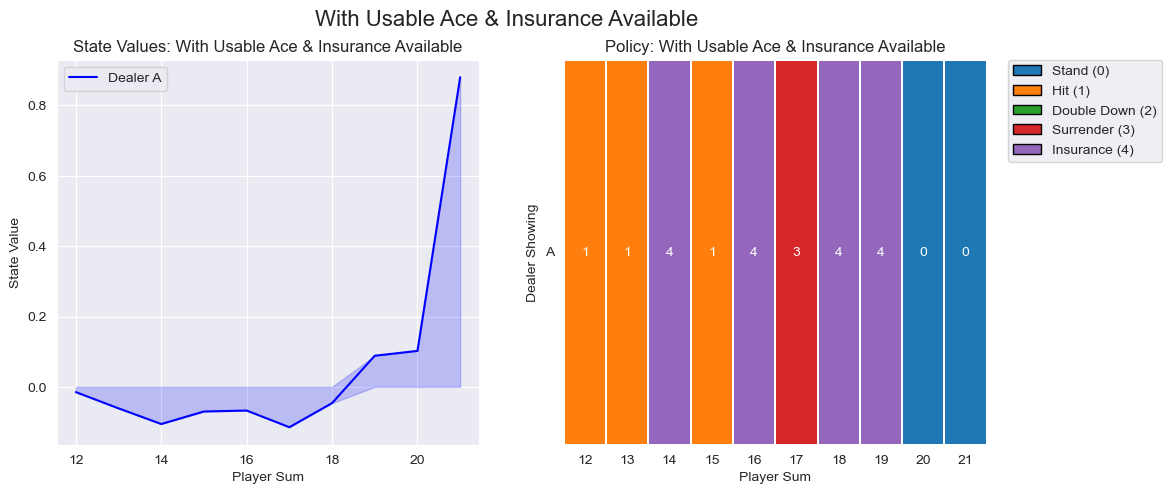

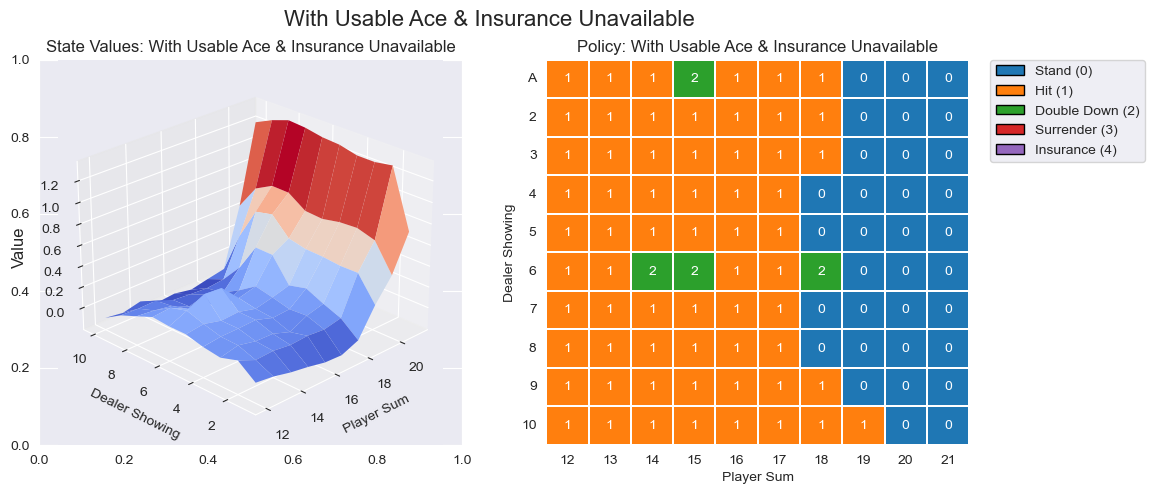

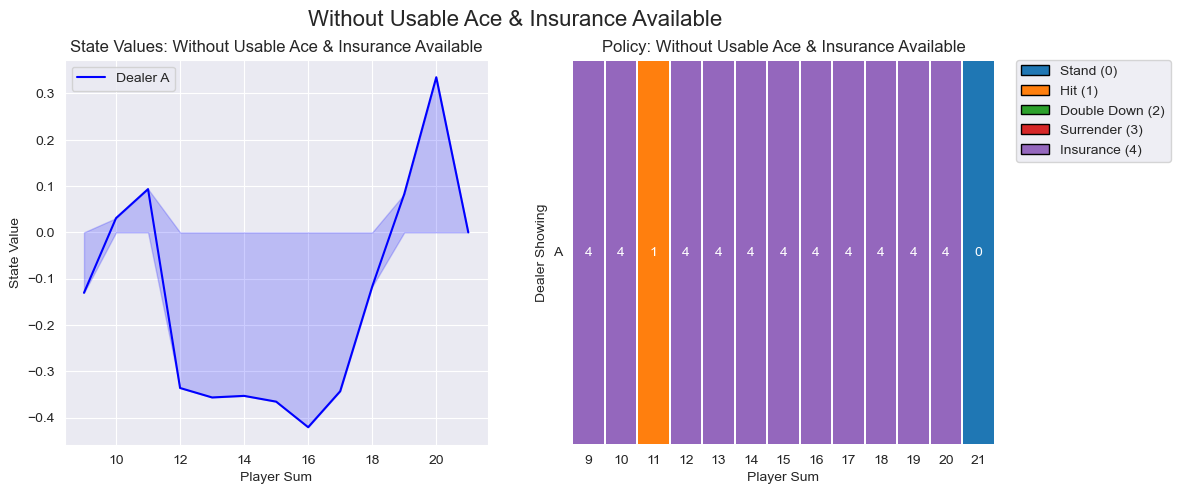

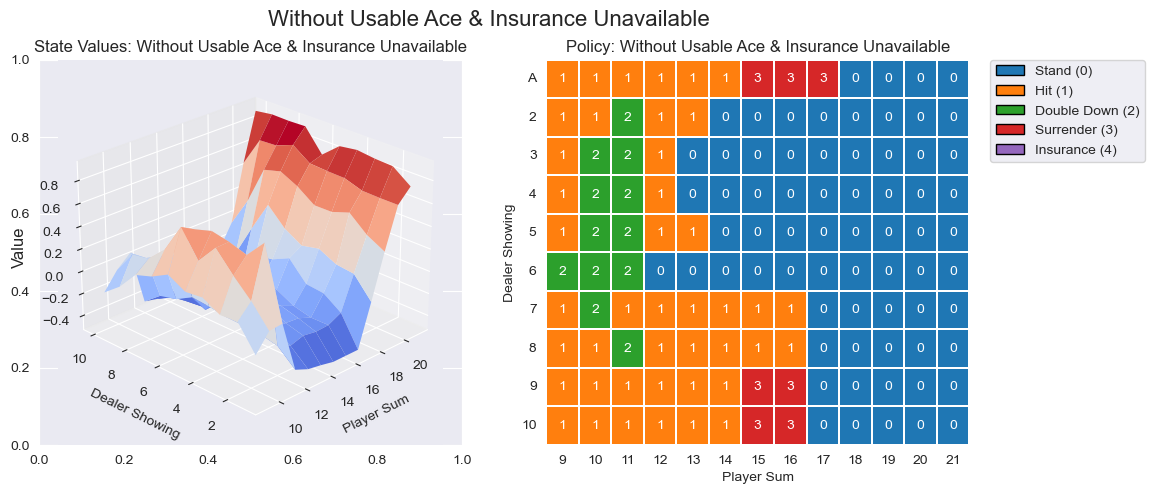

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from collections import defaultdict
from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap

def create_grids(agent, usable_ace=False, insurance_available=False):
    """Create value and policy grids given an agent with multiple actions."""
    state_value = defaultdict(lambda: 0.0)
    policy = defaultdict(lambda: 0)

    usable_ace = int(usable_ace)
    insurance_available = int(insurance_available)  # Ensure boolean is converted to int for key consistency

    for obs, action_values in agent.q_values.items():
        state_key = (obs[0], obs[1], obs[2], obs[3])  # Full state tuple
        state_value[state_key] = float(np.max(action_values))  # Store max Q-value

        # ✅ Ignore insurance (action 4) if `insurance_available = 0`
        if insurance_available == 0:
            valid_actions = [i for i in range(len(action_values)) if i != 4]  # Exclude insurance
            policy[state_key] = int(valid_actions[np.argmax([action_values[i] for i in valid_actions])])
        else:
            policy[state_key] = int(np.argmax(action_values))  # Select best action normally

    # ✅ Adjust player sum range based on usable ace condition
    player_min = 12 if usable_ace else 9
    player_max = 21  

    player_count, dealer_count = np.meshgrid(
        np.arange(player_min, player_max + 1),  
        np.arange(1, 11),   
    )

    value = np.apply_along_axis(
        lambda obs: state_value.get((obs[0], obs[1], usable_ace, insurance_available), 0),
        axis=2,
        arr=np.dstack([player_count, dealer_count]),
    )
    
    policy_grid = np.apply_along_axis(
        lambda obs: policy.get((obs[0], obs[1], usable_ace, insurance_available), 0),
        axis=2,
        arr=np.dstack([player_count, dealer_count]),
    )

    return player_count, dealer_count, value, policy_grid, policy


def create_plots(player_count, dealer_count, value, policy_grid, title: str, player_min, player_max, insurance_available):
    """Creates a plot with a line plot for values and a policy grid."""
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    fig.suptitle(title, fontsize=16)

    # ✅ Define Colors for Each Action (Ensuring Correct Order)
    action_colors = {
        0: "#1f77b4",  # Stand (Blue)
        1: "#ff7f0e",  # Hit (Orange)
        2: "#2ca02c",  # Double Down (Green)
        3: "#d62728",  # Surrender (Red)
        4: "#9467bd"   # Insurance (Purple)
    }
    cmap = ListedColormap([action_colors[i] for i in range(5)])  # Ensure proper mapping
    action_labels = ["Stand (0)", "Hit (1)", "Double Down (2)", "Surrender (3)", "Insurance (4)"]
    
    if insurance_available:
        # ✅ Left Plot: 2D Line Graph with Area Shading
        ax1 = axes[0]
        dealer_idx = 0  # Only plot values where dealer is showing Ace
        ax1.plot(
            np.arange(player_min, player_max + 1),
            value[dealer_idx, :],
            label="Dealer A",
            color="blue"
        )
        ax1.fill_between(np.arange(player_min, player_max + 1), np.min(value, axis=0), np.max(value, axis=0), alpha=0.2, color="blue")
        ax1.set_title(f"State Values: {title}")
        ax1.set_xlabel("Player Sum")
        ax1.set_ylabel("State Value")
        ax1.legend(["Dealer A"])

        # ✅ Right Plot: Policy Grid (Single Row for Insurance Available)
        ax2 = axes[1]
        policy_data = policy_grid[0, :].reshape(1, -1)  # Only row where dealer shows Ace
        sns.heatmap(policy_data, linewidth=0.3, annot=True, fmt="d",
                    cmap=cmap, cbar=False, ax=ax2,
                    xticklabels=np.arange(player_min, player_max + 1), yticklabels=["A"])
    else:
        # ✅ Left Plot: 3D Surface Plot
        ax1 = axes[0]
        ax1 = fig.add_subplot(1, 2, 1, projection="3d")
        ax1.plot_surface(
            player_count,
            dealer_count,
            value,
            rstride=1,
            cstride=1,
            cmap="coolwarm",
            edgecolor="none",
        )
        ax1.set_title(f"State Values: {title}")
        ax1.set_xlabel("Player Sum")
        ax1.set_ylabel("Dealer Showing")
        ax1.zaxis.set_rotate_label(False)
        ax1.set_zlabel("Value", fontsize=12, rotation=90)
        ax1.view_init(25, 225)

        # ✅ Right Plot: Full Policy Grid
        ax2 = axes[1]
        sns.heatmap(
            policy_grid, linewidth=0.3, annot=True, fmt="d",
            cmap=cmap, cbar=False, annot_kws={"size": 10}, ax=ax2,
            vmin=0, vmax=4,  # ✅ Ensure colors correctly map to actions
            xticklabels=np.arange(player_min, player_max + 1),
            yticklabels=["A"] + list(range(2, 11))
        )
        
    ax2.set_title(f"Policy: {title}")
    ax2.set_xlabel("Player Sum")
    ax2.set_ylabel("Dealer Showing")

    # ✅ Remove overlapping labels
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0, ha="center", fontsize=10)
    ax2.set_yticklabels(ax2.get_yticklabels(), rotation=0, ha="right", fontsize=10)
    
    # ✅ Fix Legend Placement (Prevents Overlapping)
    legend_patches = [Patch(facecolor=action_colors[i], edgecolor="black", label=action_labels[i]) for i in range(5)]
    ax2.legend(handles=legend_patches, loc="upper left", bbox_to_anchor=(1.05, 1), borderaxespad=0.)

    return fig

# ✅ Generate 4 plots based on conditions
player_count, dealer_count, value_grid, policy_grid, _ = create_grids(agent, usable_ace=True, insurance_available=1)
fig1 = create_plots(player_count, dealer_count, value_grid, policy_grid, title="With Usable Ace & Insurance Available", player_min=12, player_max=21, insurance_available=1)

player_count, dealer_count, value_grid, policy_grid, _ = create_grids(agent, usable_ace=True, insurance_available=0)
fig2 = create_plots(player_count, dealer_count, value_grid, policy_grid, title="With Usable Ace & Insurance Unavailable", player_min=12, player_max=21, insurance_available=0)

player_count, dealer_count, value_grid, policy_grid, _ = create_grids(agent, usable_ace=False, insurance_available=1)
fig3 = create_plots(player_count, dealer_count, value_grid, policy_grid, title="Without Usable Ace & Insurance Available", player_min=9, player_max=21, insurance_available=1)

player_count, dealer_count, value_grid, policy_grid, _ = create_grids(agent, usable_ace=False, insurance_available=0)
fig4 = create_plots(player_count, dealer_count, value_grid, policy_grid, title="Without Usable Ace & Insurance Unavailable", player_min=9, player_max=21, insurance_available=0)

plt.show()

In [22]:
import numpy as np

test_wins = 0
test_losses = 0
test_draws = 0
test_games = 10_000  # ✅ Increase for better evaluation

for _ in range(test_games):
    obs, _ = env.reset()
    step_count = 0  # ✅ Track number of steps

    while step_count < 100:  # ✅ Safety limit to prevent infinite loops
        if obs in agent.q_values:
            q_values = agent.q_values[obs]

            # ✅ Exclude insurance action if `insurance_available = 0`
            if obs[3] == 0:  # Assuming obs[3] represents insurance availability
                valid_actions = [i for i in range(len(q_values)) if i != 4]  # Remove insurance
                action = valid_actions[np.argmax([q_values[i] for i in valid_actions])]
            else:
                action = np.argmax(q_values)  # Select best action normally
        else:
            action = env.action_space.sample()  # ✅ Random action if state unseen

        obs, reward, terminated, truncated, _ = env.step(action)
        step_count += 1  # ✅ Increment step counter

        if terminated or truncated:  # ✅ Stop if the episode ends
            break

    # ✅ Classify game results
    if reward > 0:
        test_wins += 1  # Win
    elif reward < 0:
        test_losses += 1  # Loss
    else:
        test_draws += 1  # Draw

# ✅ Compute win rate metrics
win_rate = test_wins / test_games
win_rate_excluding_draws = test_wins / (test_wins + test_losses) if (test_wins + test_losses) > 0 else 0.0

# ✅ Print results
print(f"Total Games: {test_games:,}")
print(f"Wins: {test_wins:,} ({win_rate:.2%})")
print(f"Losses: {test_losses:,} ({(test_losses / test_games):.2%})")
print(f"Draws: {test_draws:,} ({(test_draws / test_games):.2%})")
print(f"Win Rate (Excluding Draws): {win_rate_excluding_draws:.2%}")

Total Games: 10,000
Wins: 4,131 (41.31%)
Losses: 5,021 (50.21%)
Draws: 848 (8.48%)
Win Rate (Excluding Draws): 45.14%


In [24]:
import numpy as np

test_wins = 0
test_losses = 0
test_draws = 0
test_games = 10_000  # ✅ Increase for better evaluation

for _ in range(test_games):
    obs, _ = env.reset()
    step_count = 0  # ✅ Track number of steps

    while step_count < 100:  # ✅ Safety limit to prevent infinite loops
        if obs in agent.q_values:
            q_values = agent.q_values[obs]

            # ✅ Exclude insurance action if `insurance_available = 0`
            if obs[3] == 0:  # Assuming obs[3] represents insurance availability
                valid_actions = [i for i in range(len(q_values)) if i != 4]  # Remove insurance
                action = valid_actions[np.argmax([q_values[i] for i in valid_actions])]
            else:
                action = np.argmax(q_values)  # Select best action normally
        else:
            action = env.action_space.sample()  # ✅ Random action if state unseen

        obs, reward, terminated, truncated, _ = env.step(action)
        step_count += 1  # ✅ Increment step counter

        if terminated or truncated:  # ✅ Stop if the episode ends
            break

    # ✅ Classify game results
    if reward > 0:
        test_wins += 1  # Win
    elif reward < 0:
        test_losses += 1  # Loss
    else:
        test_draws += 1  # Draw

# ✅ Compute win rate metrics
win_rate = test_wins / test_games
win_rate_excluding_draws = test_wins / (test_wins + test_losses) if (test_wins + test_losses) > 0 else 0.0

# ✅ Print results
print(f"Total Games: {test_games:,}")
print(f"Wins: {test_wins:,} ({win_rate:.2%})")
print(f"Losses: {test_losses:,} ({(test_losses / test_games):.2%})")
print(f"Draws: {test_draws:,} ({(test_draws / test_games):.2%})")
print(f"Win Rate (Excluding Draws): {win_rate_excluding_draws:.2%}")

Total Games: 10,000
Wins: 4,197 (41.97%)
Losses: 4,965 (49.65%)
Draws: 838 (8.38%)
Win Rate (Excluding Draws): 45.81%
